## Machine Learning Predictions for Ground-Water Ages

[insert team member names and any other relevant information that goes here ... ]

Importing libraries ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
plt.rcParams.update({'font.size': 10})

import warnings
warnings.filterwarnings('ignore')

print('Libraries imported successfully!')


Libraries imported successfully!


Importing relevant script files ... 

In [2]:
from importing_files import importing_files
from Data_Augmentation import augment_data
from decision_tree_classifier import decision_tree_classifier
from decision_tree_regressor import decision_tree_regressor
from partial_dependence import partial_dependence_plot
from sklearn.metrics import mean_squared_error
from subplots_script import script_subplots

print('Relevant script files imported successfully!')

Relevant script files imported successfully!


### Preprocessing Data
Optioinal steps include data imputation, z-score normalization, log-normal transformations



Dataset imported with the shape: (3033, 117)
Understanding the dataset features:
The datasources for this dataset are: ['GAMA_USGS' 'USGS_NWIS' 'LLNL' 'UCD']
GAMA_USGS has 971 entries
USGS_NWIS has 1261 entries
LLNL has 601 entries
UCD has 200 entries
Total Group 0 features in the database: 32
Group 0 features in the dataset imported: 32
Total Group 1 features in the database: 32
Group 1 features in the dataset imported: 32
Total Group 2 features in the database: 29
Group 2 features in the dataset imported: 29
Total Group 3 features in the database: 3
Group 3 features in the dataset imported: 3
Total Group 4 features in the database: 3
Group 4 features in the dataset imported: 3
Total Group Label features in the database: 1
Group Label features in the dataset imported: 1
Total Group Nil  features in the database: 13
Group Nil  features in the dataset imported: 12


Number of columns to be dropped: 35
After removing group: [0, 4, 'Nil'] columns, the remaining dataset has: 3033 rows an

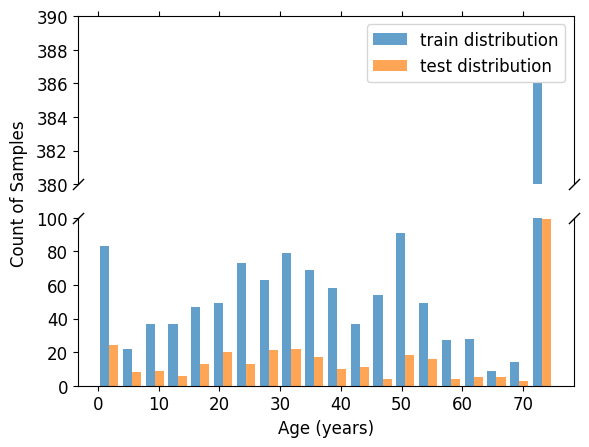

In [3]:
# Importing the data with all the features and groups
input_dict = importing_files()

# Preprocessing the dataset (log transformations, normalizations, and imputations) followed by generating train-test splits
output_data = augment_data(input_dict=input_dict,augmented_size=0,log_normal=True,plot_dist_split=True)

# generating key-value pairs for features and their labels for plots (useful for plots later ... )
features = output_data['X_train_augmented'].columns
to_retain = input_dict['df_columns']['variable'].isin(list(features)) 
variables = list(input_dict['df_columns'][to_retain]['Feature Name'].dropna())
feature_names = dict(zip(features, variables))

X_train,X_test,y_train,y_test,y_train_binary,y_test_binary = output_data['X_train_augmented'],output_data['X_test'],output_data['y_train_augmented'],output_data['y_test'],output_data['y_train_binary'],output_data['y_test_binary']

X_train = X_train.rename(columns=feature_names)
X_test = X_test.rename(columns=feature_names)

### Binary Classification (Young-versus-Old Samples)

The following code performs binary classification on the young-versus-old water samples (<70 years).
The default classification algorithm is 'BaggingClassifier' however, the user can change this to the following:\
Single Decision Tree Classifier with early-stopping: 'DecisionTreeClassifier' \
Cost-complexity pruned classifier: 'PrunedClassifier' \
Random Forest Classifier: 'RandomForestClassifier' \
AdaBoost Classifier: 'AdaBoostClassifier' \
Gradient Boosting Classifier: 'GradientBoostingClassifier' \

Performing Bagging Decision Tree Classification with user-defined hyper-parameters and cross- validation (5): ...
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=37), 'max_samples': 1.0, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': 37, 'verbose': 0}
Train Precision: 1.0
Train Recall: 1.0
Train F-1 Score: 1.0
Test Precision: 0.7843137254901961
Test Recall: 0.8247422680412371
Test F-1 Score: 0.8040201005025125


<Figure size 640x480 with 0 Axes>

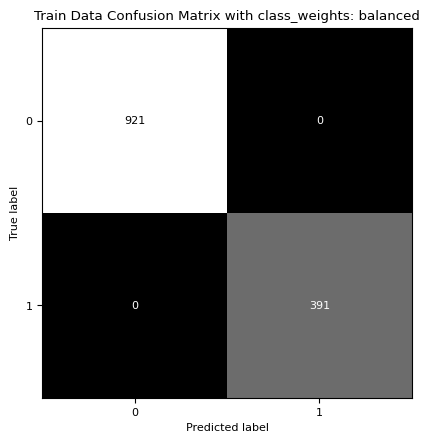

<Figure size 640x480 with 0 Axes>

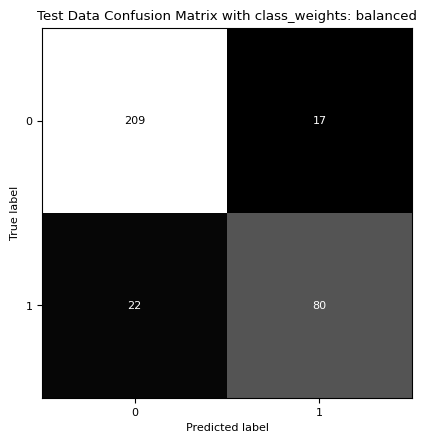

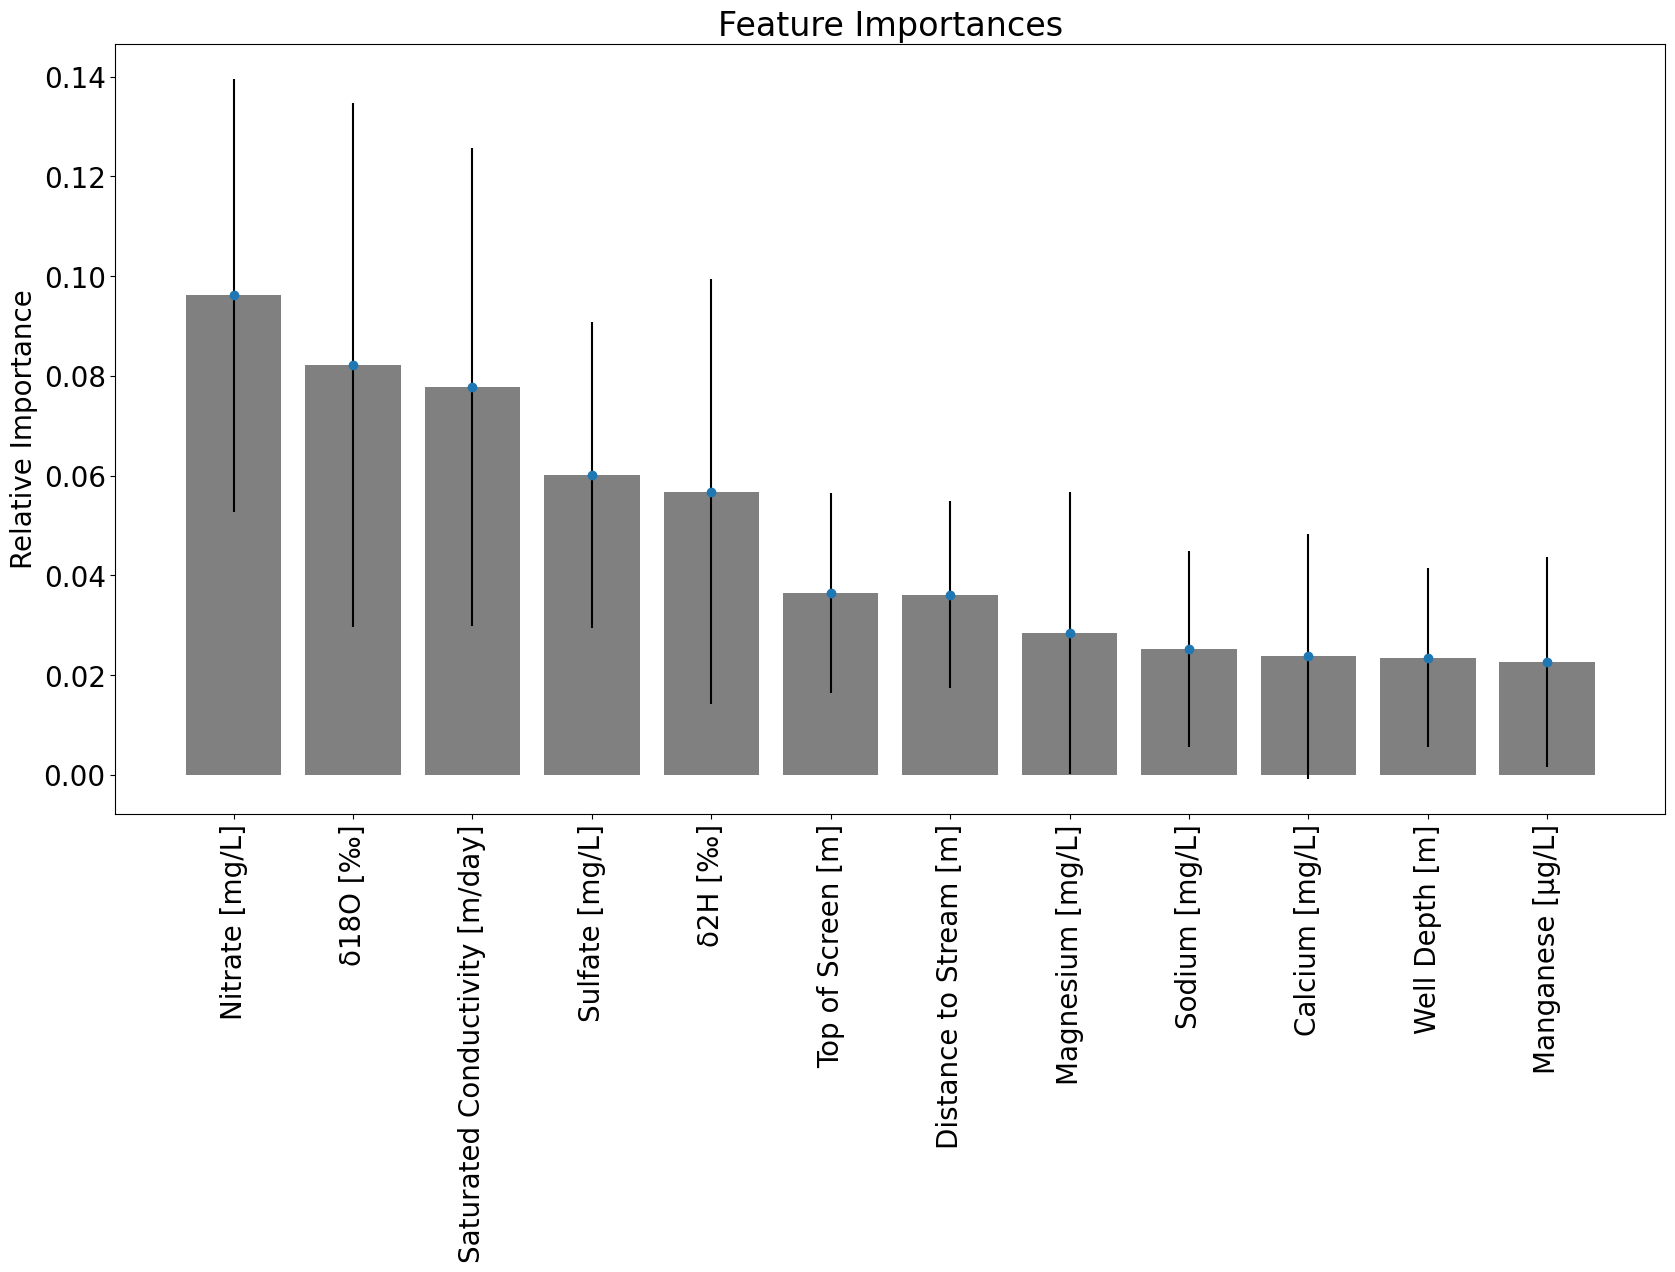

In [4]:
class_weight = 'balanced' # class weight assigned based on the frequency of the training samples per class 

classifier = 'BaggingClassifier' 
output_classifier = decision_tree_classifier(X_train=X_train,X_test=X_test,y_train=y_train_binary,y_test=y_test_binary,classifier=classifier,feature_imp=True,plot_tree=True,hyperparameter=False,class_weight=class_weight,save_results=True)

Nitrate [mg/L]
δ18O [‰]
Saturated Conductivity [m/day]
Sulfate [mg/L]
δ2H [‰]
Top of Screen [m]
Distance to Stream [m]
Magnesium [mg/L]
Sodium [mg/L]
Calcium [mg/L]
Well Depth [m]
Manganese [μg/L]


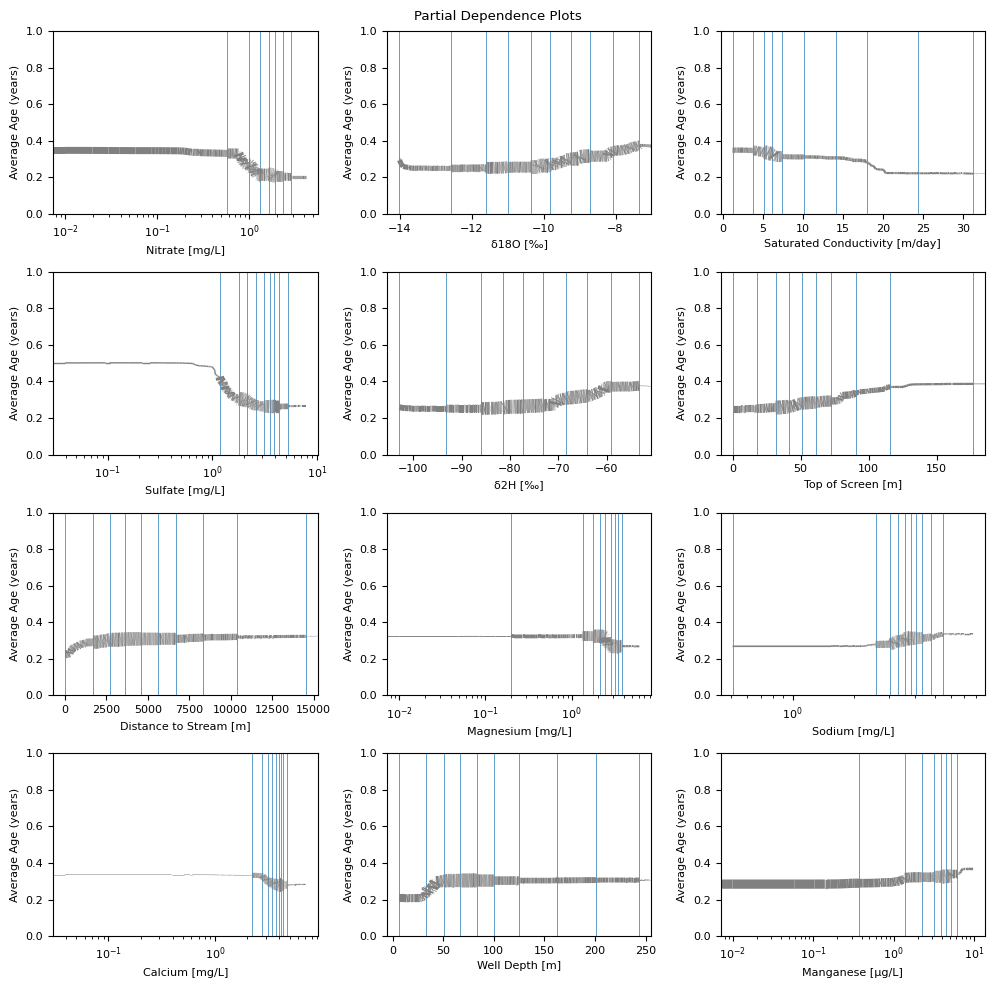

In [5]:
pdp_outputs = partial_dependence_plot(output_classifier, X_train,y_train,plot=True,classifier=True,df_columns=input_dict['df_columns'])

### Continous Regression Decision Trees (Entire Dataset)

The following lines of codes performs prediction of ground water ages using the various decision tree algorithms employed below.

##### Decision Tree with early stopping (cross-validation)

Performing Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building a decision tree using pre-pruning steps i.e., cross validation 

Best parameters: {'criterion': 'squared_error', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 37, 'splitter': 'best'}
Best score (GridSearchCV.best_score_): -432.69167309116267
DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, random_state=37)
plotting tree: ... 
Train RMSE: 16.10549375400523
Train R-squared Score: 0.5739732929060359
Test RMSE: 22.430401433282096
Test R-squared Score: 0.2268800402364204
feature_importance_df is:                           Feature  Importance
35                 Well Depth [m]    0.167368
31                       δ18O [‰]    0.158792
14                 Calcium [mg/L]    0.078427
2               Top of Screen [m]    0.077676
24               Manganese [μg/L]    0.065108
..                            ...         ...
49   % pasture

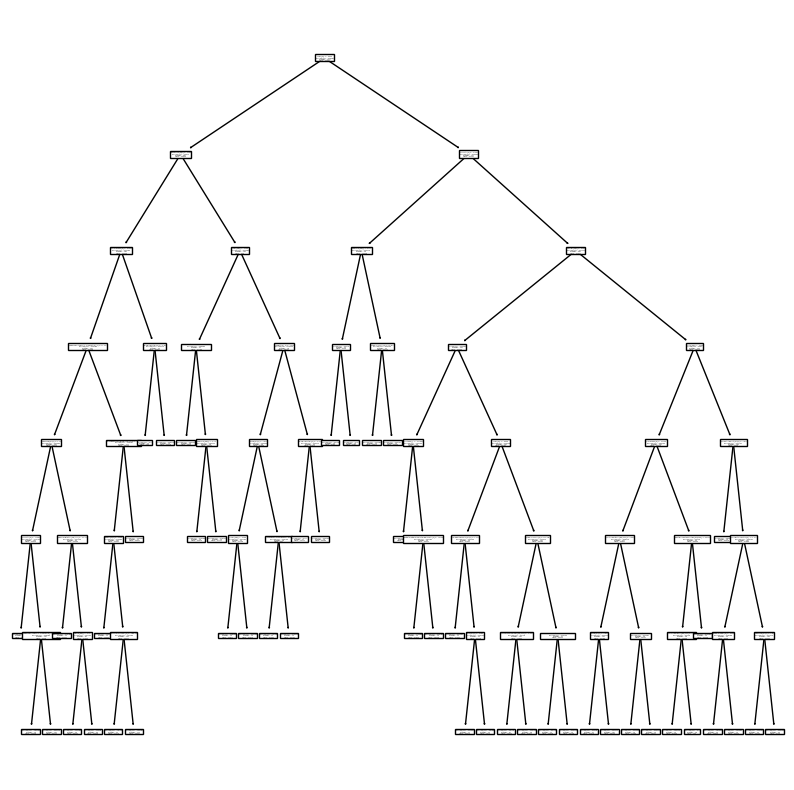

<Figure size 1000x1000 with 0 Axes>

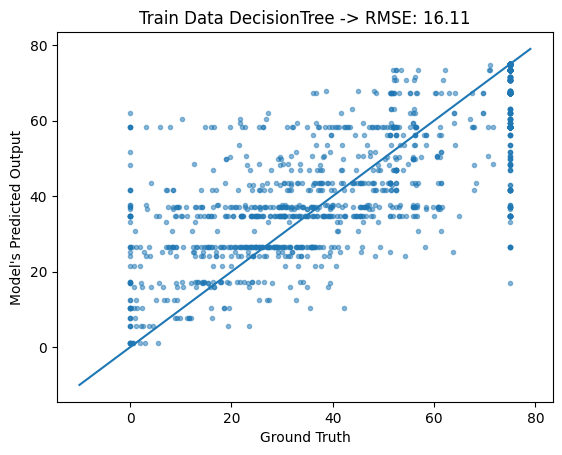

<Figure size 1000x1000 with 0 Axes>

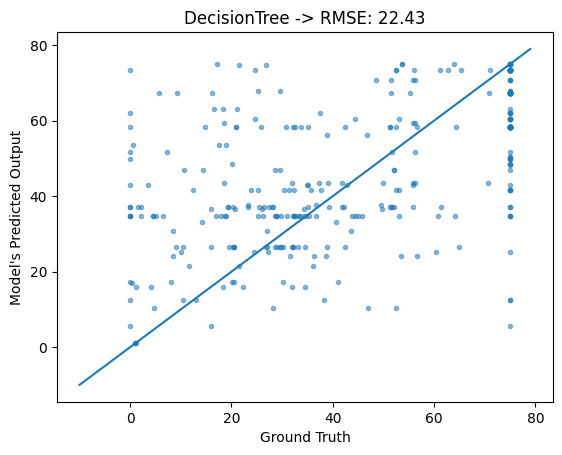

<Figure size 1000x1000 with 0 Axes>

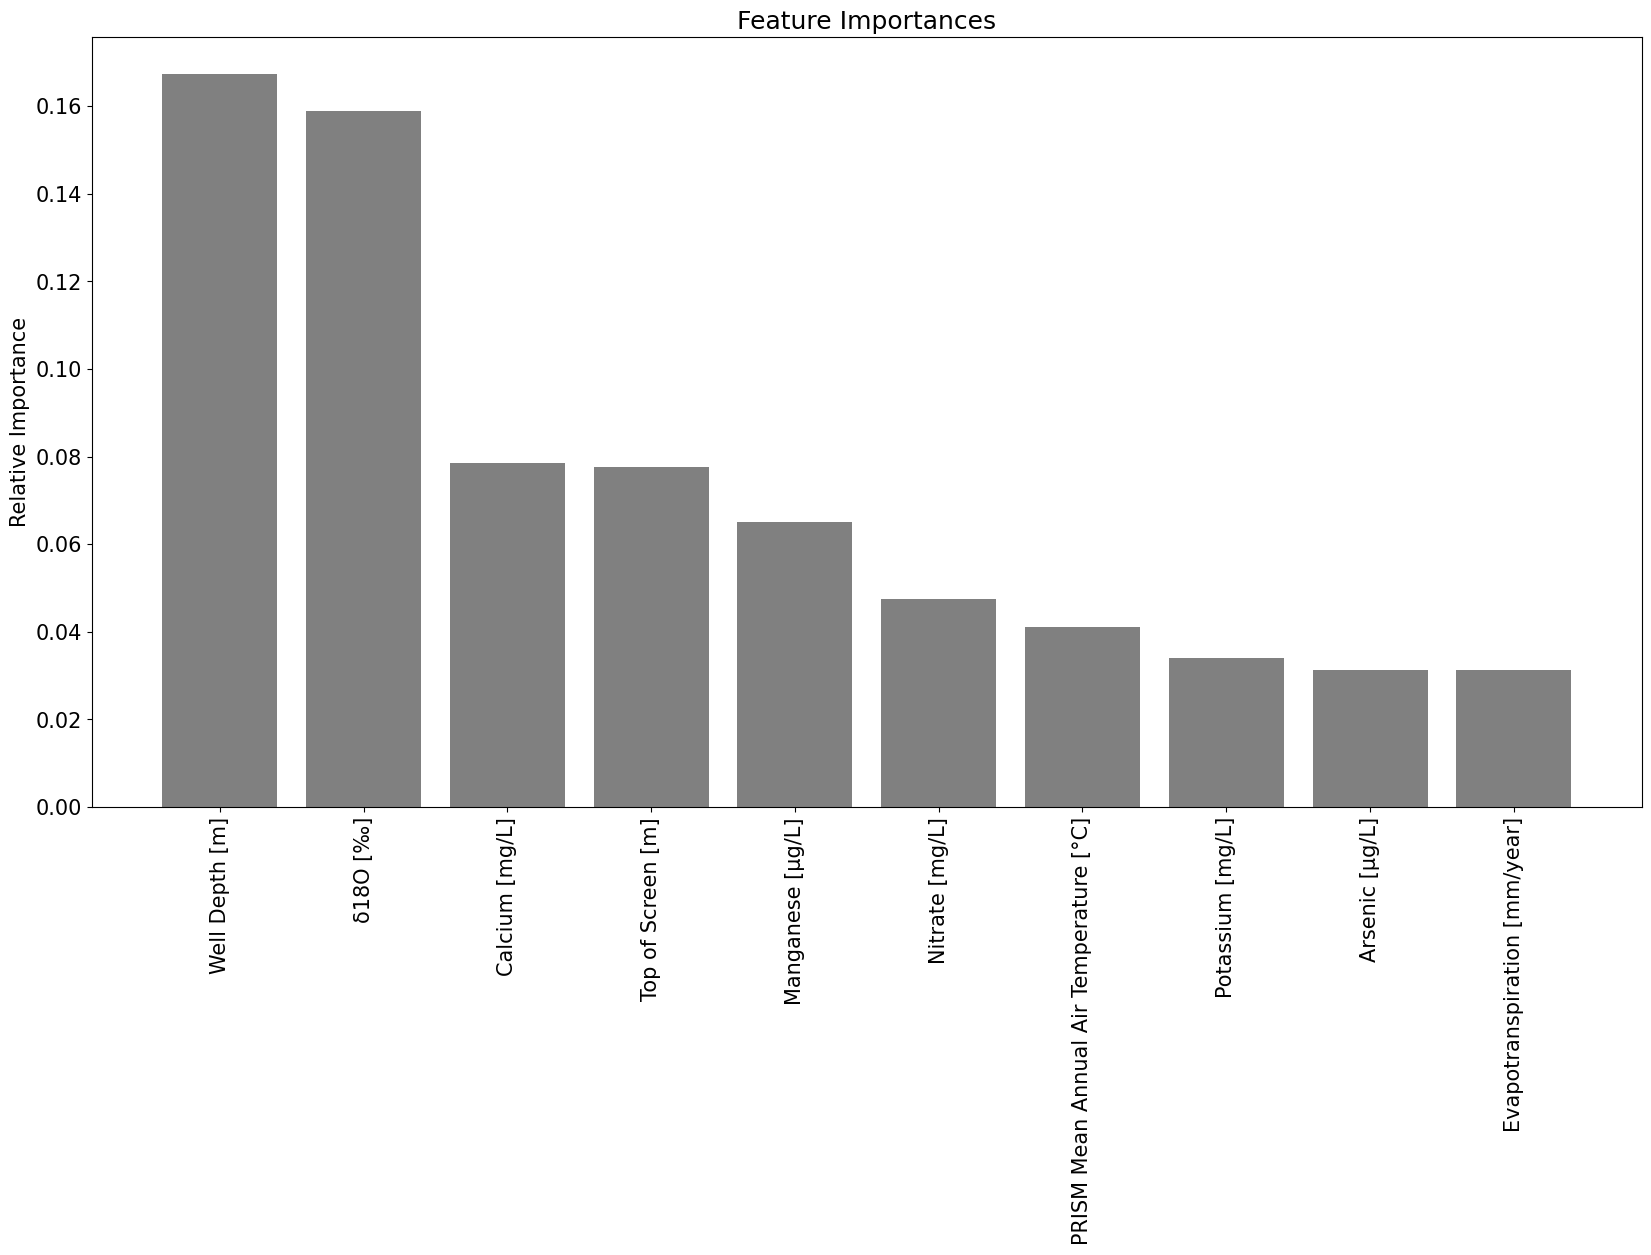

In [5]:
regressor = 'DecisionTree'
output_regressor = decision_tree_regressor(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, regressor=regressor, feature_imp=True, hyperparameter=True, plot_tree=True, random_state=37,save_results=True,param_grid={'criterion': ['squared_error'],'splitter':['best'],'random_state':[37]})


##### Decision Tree with cost-complexity-pruning

Performing Decision Tree Regression via Pruning: ...
Building an overfitted decision tree and performing ccp_alpha pruning 

Number of nodes in the last tree is 1 with ccp_alpha as 52.23129139236141
DecisionTreeRegressor(ccp_alpha=37.60691457244843, random_state=37)
DecisionTreeRegressor(ccp_alpha=7.454796199286385, random_state=37)
plotting tree: ... 
Train RMSE: 18.484017907933733
Train R-squared Score: 0.43884672862657625
Test RMSE: 21.73554010824774
Test R-squared Score: 0.27403837127992137


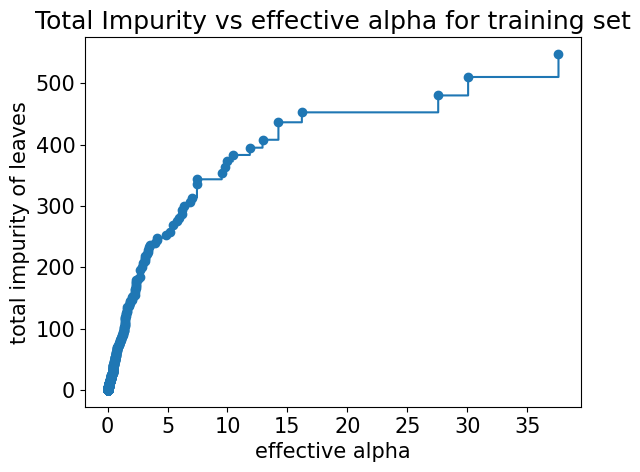

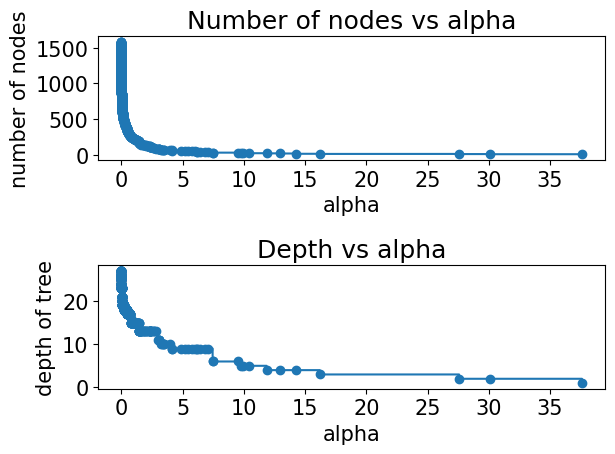

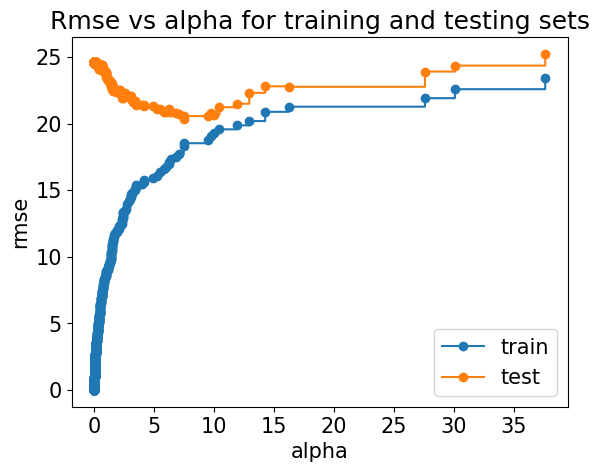

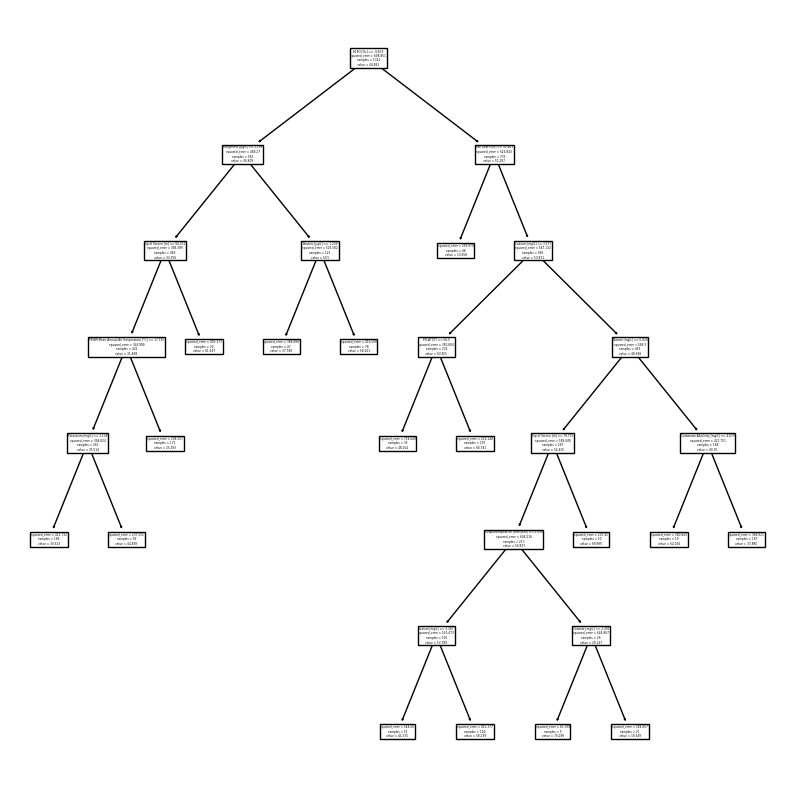

<Figure size 1000x1000 with 0 Axes>

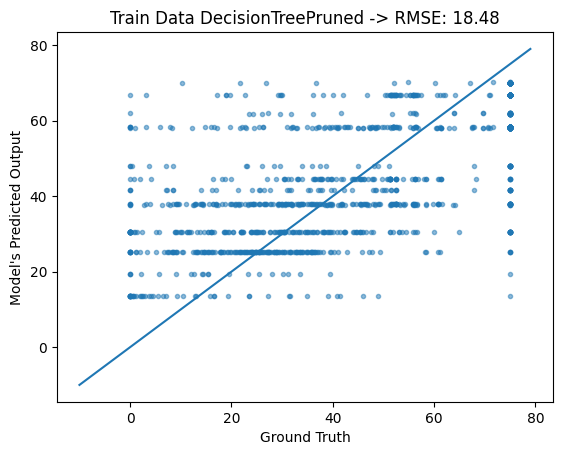

<Figure size 1000x1000 with 0 Axes>

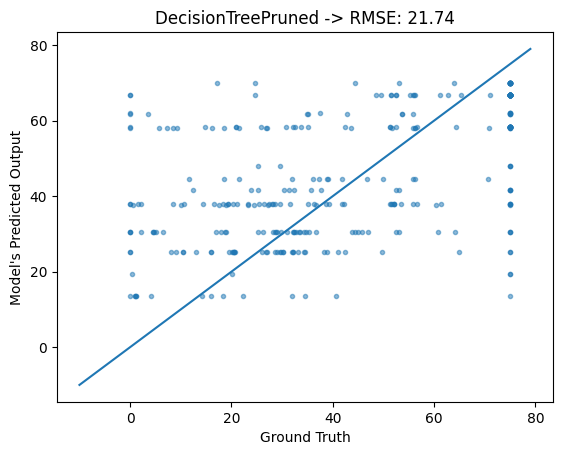

In [6]:
regressor = 'DecisionTreePruned'
output_regressor = decision_tree_regressor(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, regressor=regressor, feature_imp=False, hyperparameter=True, plot_tree=True, random_state=37,save_results=True)

##### Ensemble Learning BAGGING Regressor 

Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 3000, 'n_jobs': -1, 'random_state': 37, 'verbose': 0}
Best score (GridSearchCV.best_score_): -315.94924603344487
Train RMSE: 6.361712438740847
Train R-squared Score: 0.9335282968543346
Test RMSE: 17.58010192312988
Test R-squared Score: 0.5250853457677749
feature_importance_df is:                  Feature  Importance  Deviations
0           Latitude [°]    0.009933    0.009803
1          Longitude [°]    0.017074    0.017580
2      Top of Screen [m]    0.046572    0.023118
3   Bottom of Screen [m]    0.006809    0.007105
4         Nitrate [mg/L]    0.023472    0.020629
..                   ...         ...         ...
71            Relief [m]    0.003973    0.006382
72              PFLATTOT    0.002572    0.004103
73

<Figure size 1000x1000 with 0 Axes>

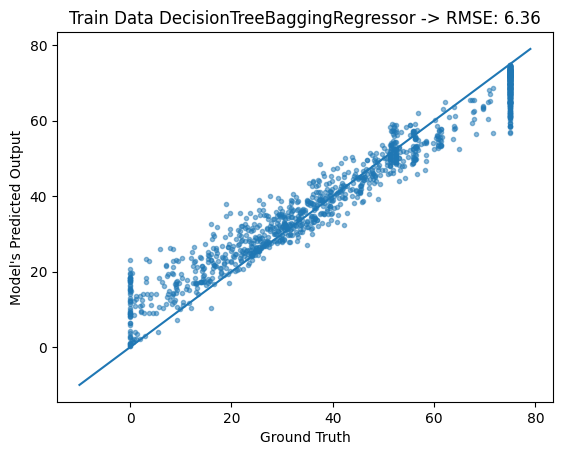

<Figure size 1000x1000 with 0 Axes>

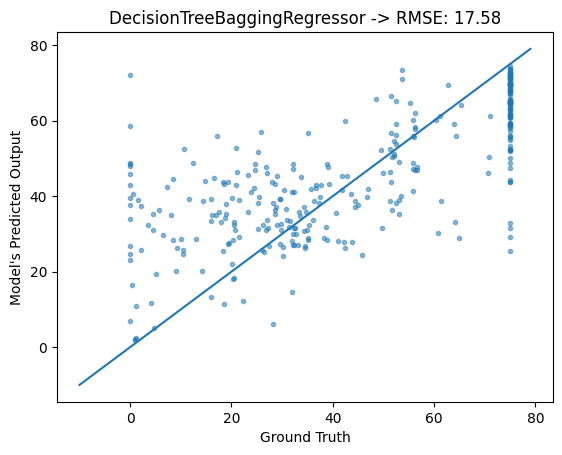

<Figure size 1000x1000 with 0 Axes>

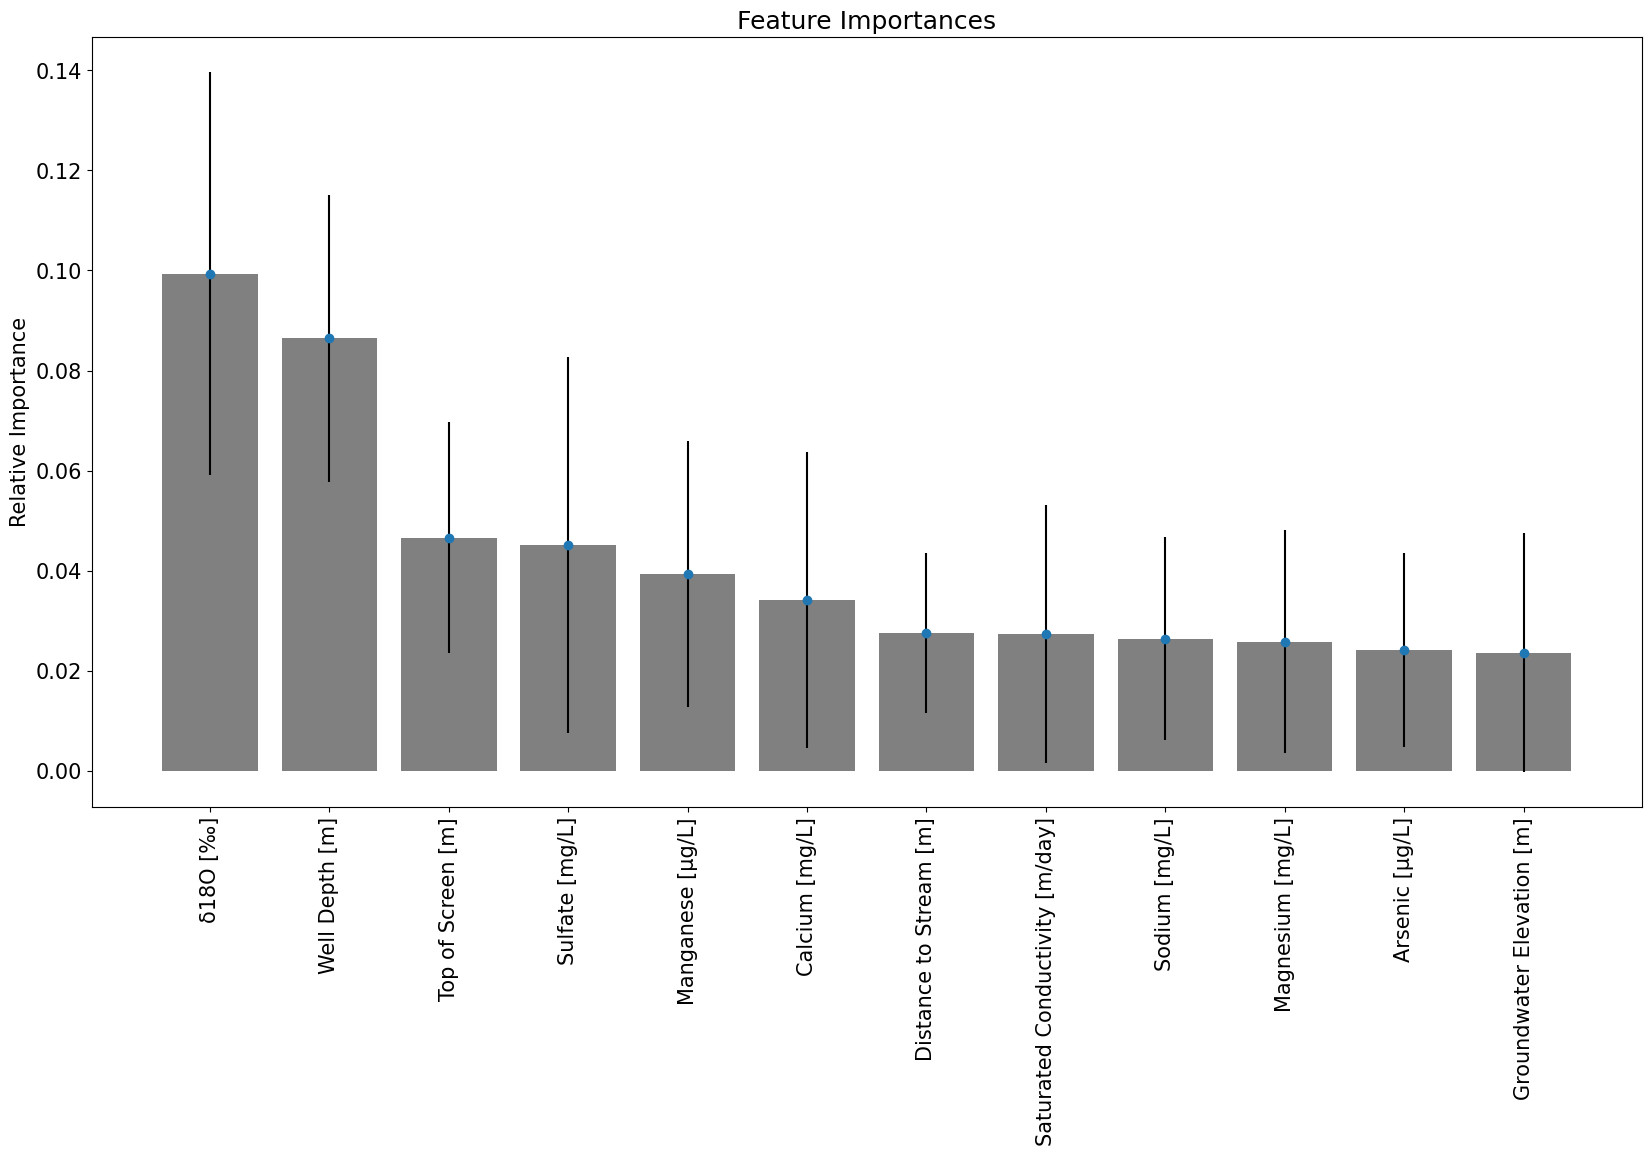

In [4]:
regressor = 'DecisionTreeBaggingRegressor'
output_regressor = decision_tree_regressor(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, regressor=regressor, feature_imp=True, hyperparameter=True, plot_tree=False, random_state=37,save_results=True)

δ18O [‰]
Well Depth [m]
Top of Screen [m]
Sulfate [mg/L]
Manganese [μg/L]
Calcium [mg/L]
Distance to Stream [m]
Saturated Conductivity [m/day]
Sodium [mg/L]
Magnesium [mg/L]
Arsenic [μg/L]
Groundwater Elevation [m]


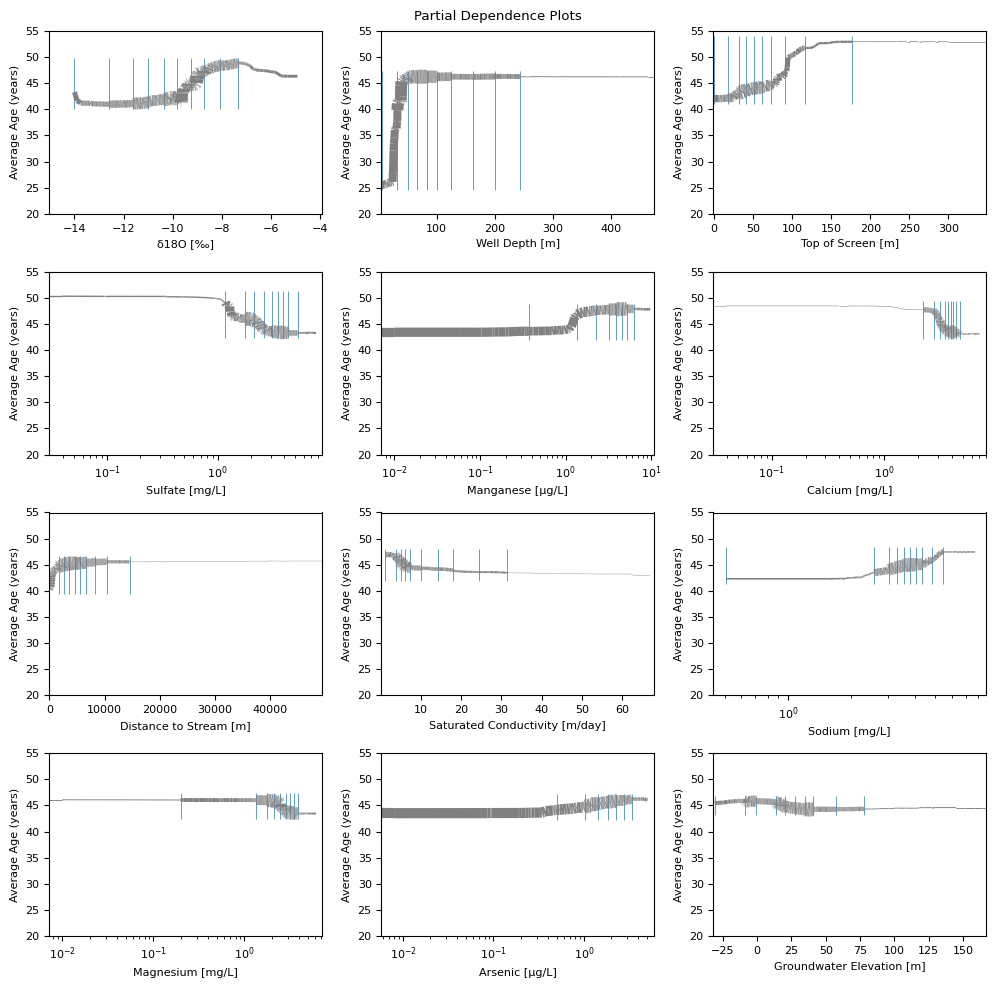

In [5]:
### Code may take around ~100 minutes to run!
pdp_outputs = partial_dependence_plot(output_regressor, X_train,y_train,plot=True,df_columns=input_dict['df_columns'])

δ18O [‰]
Well Depth [m]
Top of Screen [m]
Sulfate [mg/L]
Manganese [μg/L]
Calcium [mg/L]
Distance to Stream [m]
Saturated Conductivity [m/day]
Sodium [mg/L]
Magnesium [mg/L]
Arsenic [μg/L]
Groundwater Elevation [m]


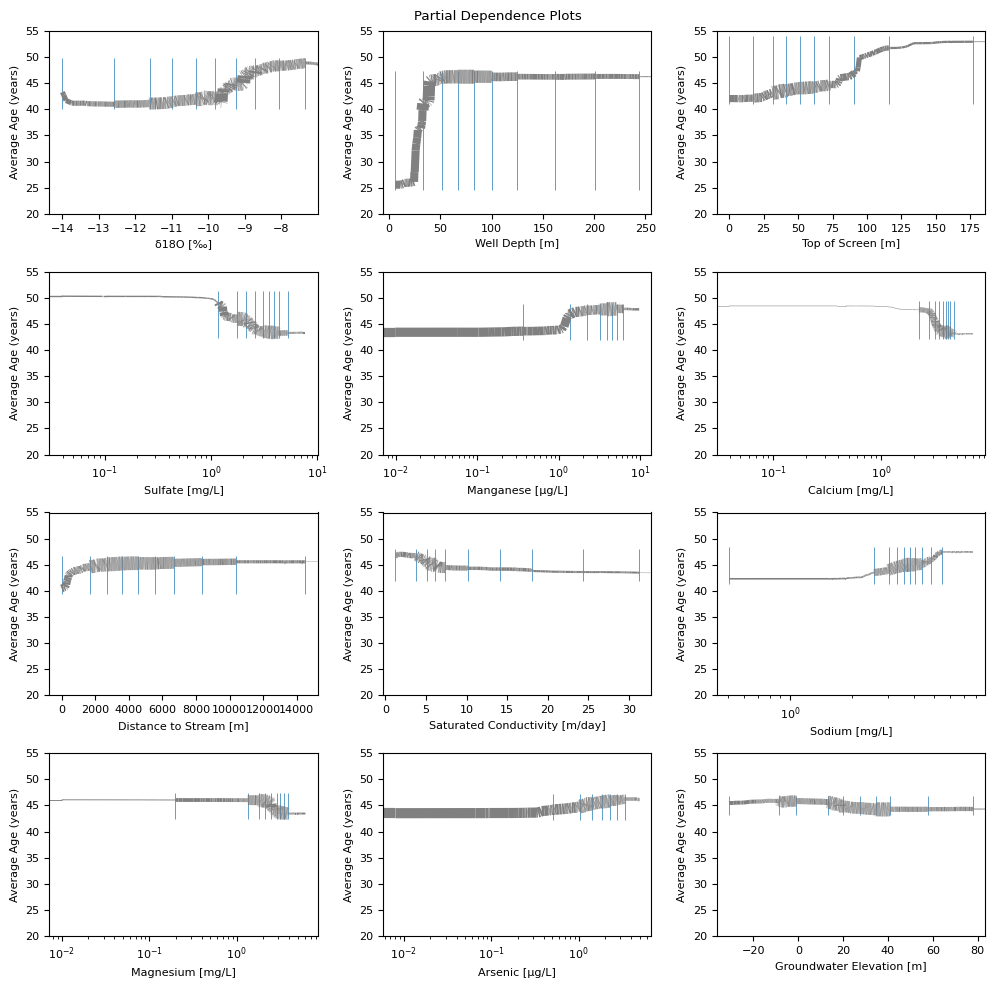

In [5]:
### Code may take around ~100 minutes to run!
pdp_outputs = partial_dependence_plot(output_regressor, X_train,y_train,plot=True,df_columns=input_dict['df_columns'])

##### Ensemble Learning Random Forest Regressor 

Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': 37, 'verbose': 0}
Best score (GridSearchCV.best_score_): -313.9999534111397
Train RMSE: 6.372577294784238
Train R-squared Score: 0.9333010554622642
Test RMSE: 17.418412262816076
Test R-squared Score: 0.5337810477924207


<Figure size 1000x1000 with 0 Axes>

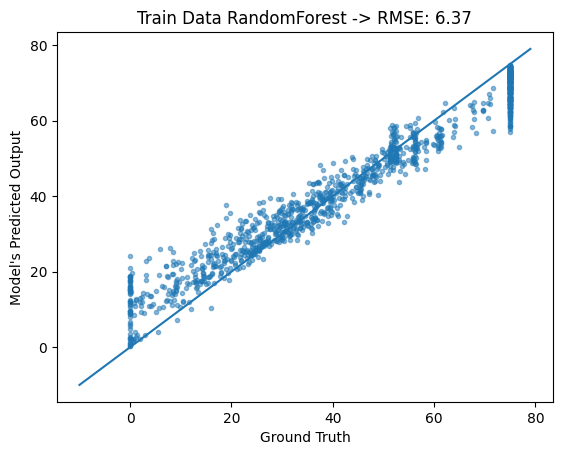

<Figure size 1000x1000 with 0 Axes>

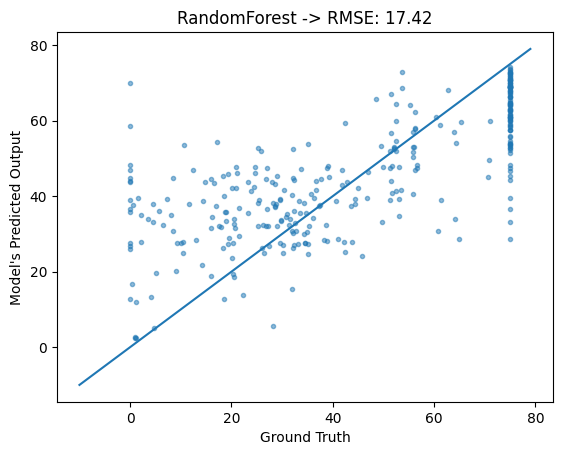

In [8]:
regressor = 'RandomForest'
output_regressor = decision_tree_regressor(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, regressor=regressor, feature_imp=False, hyperparameter=True, plot_tree=False, random_state=37,save_results=True)

##### Ensemble Learning AdaBoost Regressor 

Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 37}
Best score (GridSearchCV.best_score_): -338.6232803836275
Train RMSE: 13.036407375421275
Train R-squared Score: 0.7208712411640257
Test RMSE: 18.34932748122094
Test R-squared Score: 0.48261587792613836


<Figure size 1000x1000 with 0 Axes>

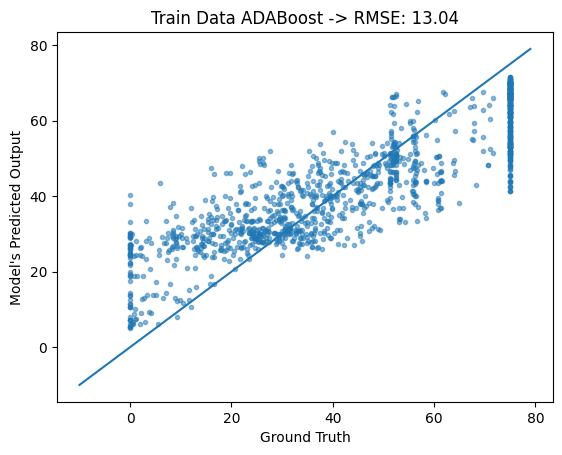

<Figure size 1000x1000 with 0 Axes>

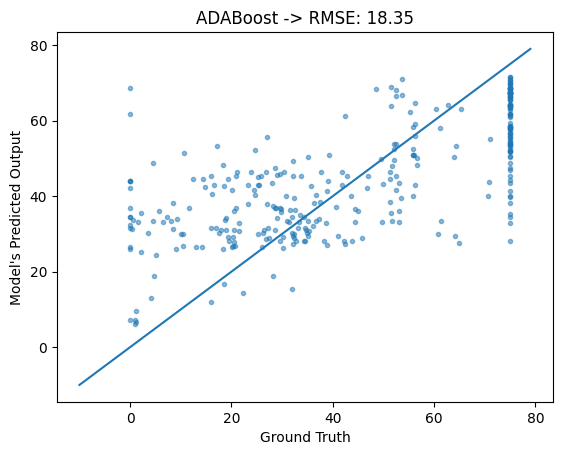

In [9]:
regressor = 'ADABoost'
output_regressor = decision_tree_regressor(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, regressor=regressor, feature_imp=False, hyperparameter=True, plot_tree=False, random_state=37,save_results=True)

##### Ensemble Learning Gradient Boosting Regressor

Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 10, 'n_estimators': 500, 'random_state': 37, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -311.8361512450915
Train RMSE: 8.544412383031156
Train R-squared Score: 0.8800906249871376
Test RMSE: 18.115720722941376
Test R-squared Score: 0.49570573752024627


<Figure size 1000x1000 with 0 Axes>

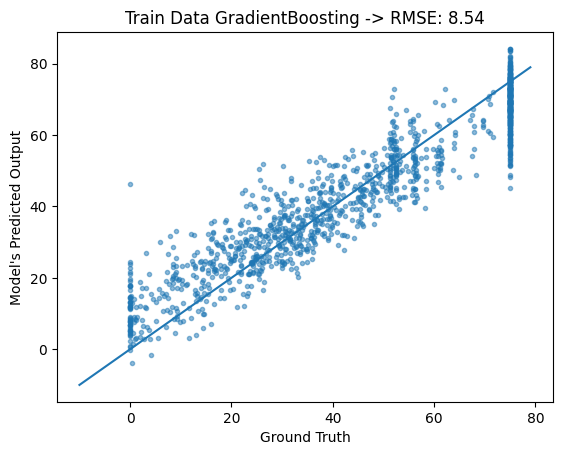

<Figure size 1000x1000 with 0 Axes>

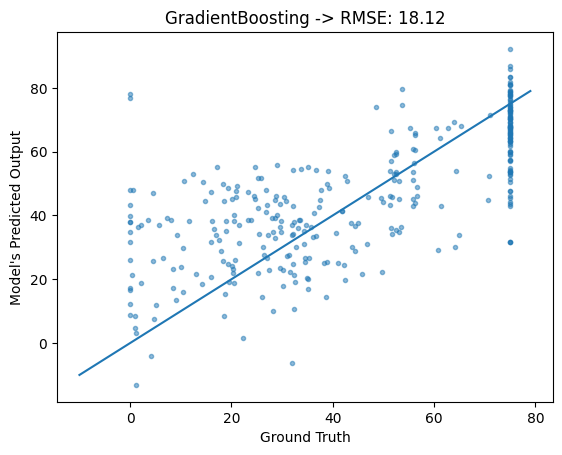

In [10]:
regressor = 'GradientBoosting'
output_regressor = decision_tree_regressor(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, regressor=regressor, feature_imp=False, hyperparameter=True, plot_tree=False, random_state=37,save_results=True)

9.738430583501012

### 2-Step Approach (BAGGING Classifier + BAGGING Regressor)

Performing Bagging Decision Tree Classification with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=37), 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 37, 'verbose': 0}
Train Precision: 1.0
Train Recall: 1.0
Train F-1 Score: 1.0
Test Precision: 0.7843137254901961
Test Recall: 0.8080808080808081
Test F-1 Score: 0.7960199004975124
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 37, 'verbose': 0}
Best score (GridSearchCV.best_score_): -210.96606435495656
Train RMSE: 5.252567326877312
Tra

<Figure size 640x480 with 0 Axes>

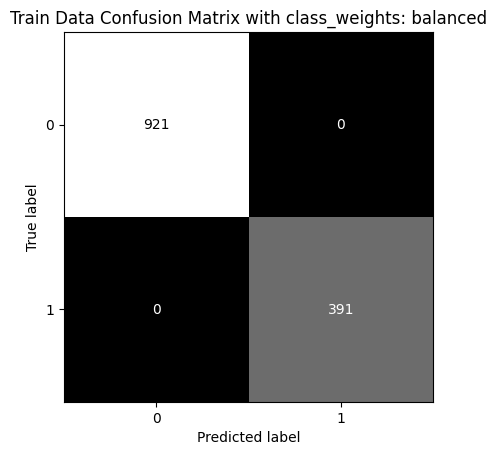

<Figure size 640x480 with 0 Axes>

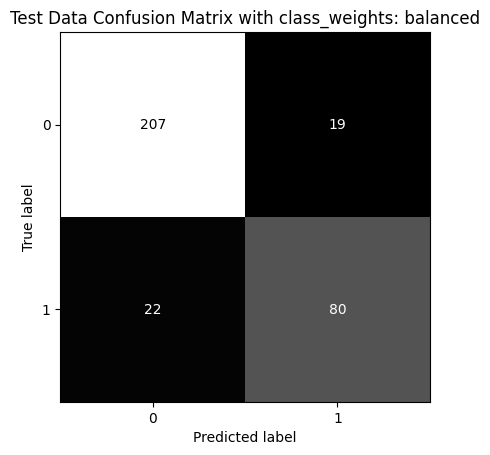

<Figure size 1000x1000 with 0 Axes>

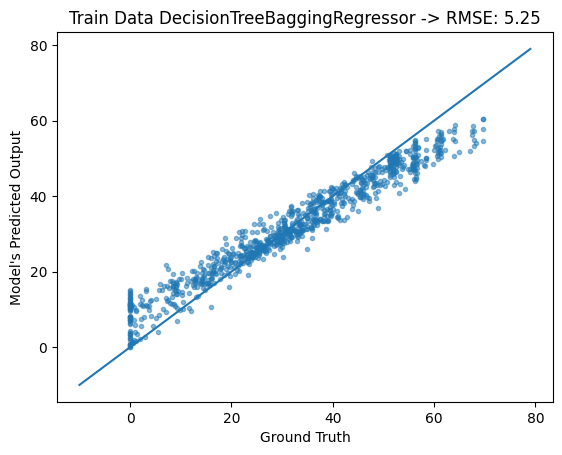

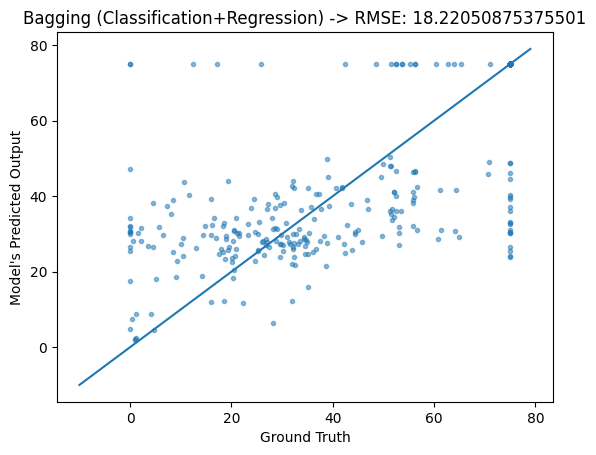

In [11]:
class_weight = 'balanced'
output_classifier = decision_tree_classifier(X_train=X_train,X_test=X_test,y_train=y_train_binary,y_test=y_test_binary,classifier='BaggingClassifier',feature_imp=False,plot_tree=False,hyperparameter=True,class_weight=class_weight)

y_pred_classification = output_classifier['best_model'].predict(X_test) # make prediction
# separating out the young samples from the old for regressor training
X_train_young, y_train_young = X_train[y_train_binary['age']==0],y_train[y_train_binary['age']==0]

output_regressor = decision_tree_regressor(X_train=X_train_young,X_test=None,y_train=y_train_young,y_test=None,regressor='DecisionTreeBaggingRegressor',feature_imp=False,hyperparameter=True,plot_tree=False)

y_pred_binary_test = output_classifier['best_model'].predict(X_test)
y_pred_binary_test = pd.Series(y_pred_binary_test,index=y_test.index) # realigning indices 

y_pred_binary_young, y_pred_binary_old = y_pred_binary_test[y_pred_binary_test==0], y_pred_binary_test[y_pred_binary_test==1]

y_pred_regressor_second_young = output_regressor['best_model'].predict(X_test.loc[y_pred_binary_young.index])
y_pred_regressor_second_young = pd.Series(y_pred_regressor_second_young,index=y_pred_binary_young.index)

y_groundtruth_young_regressor_second = y_test[y_pred_binary_young.index]

y_groundtruth_second_old = y_test[y_pred_binary_old.index]
y_pred_second_old = y_groundtruth_second_old.copy().apply(lambda x: 75)

final_prediction = pd.concat([y_pred_regressor_second_young,y_pred_second_old],axis=0)
groundtruth = pd.concat([y_groundtruth_young_regressor_second,y_groundtruth_second_old],axis=0)

final_prediction_np , groundtruth_np = np.array(final_prediction),np.array(groundtruth)
rmse = np.sqrt(mean_squared_error(final_prediction_np, groundtruth_np))
print("Test RMSE:", rmse)

timestamp = datetime.datetime.now()
year,month,day,hour,min,sec = timestamp.year,timestamp.month,timestamp.day,timestamp.hour,timestamp.minute,timestamp.second

save_path = '../Result Plots/'
path = save_path+'2-step'

x = range(-10,80)
y = x
plt.figure()
plt.plot(x,y,label='y=x')
plt.scatter(groundtruth_np,final_prediction_np,marker='.',alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Model\'s Predicted Output')
plt.title(f"Bagging (Classification+Regression) -> RMSE: {rmse}")
plt.savefig(f"{path}_.png",dpi=720)


### BAGGING Regression on Young Samples only

Performing Decision Tree Bagging Regressor using user-defined hyper-parameters and cross-validation (5) ...
Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 3000, 'n_jobs': -1, 'random_state': 37, 'verbose': 0}
Best score (GridSearchCV.best_score_): -212.64109924002733


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 5.239498021136727
Train R-squared Score: 0.9145178325833344
Groundwater Elevation [m]
Well Depth [m]
Nitrate [mg/L]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Depth to Water minus Total Well Depth [m]
Potassium [mg/L]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Evapotranspiration [mm/year]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: U

Dissolved Oxygen [mg/L]
Dexcess [‰]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: U

Distance to Stream [m]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: U

δ18O [‰]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: U

Sulfate [mg/L]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: U

Depth to Water [m]


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: U

<Figure size 1000x1000 with 0 Axes>

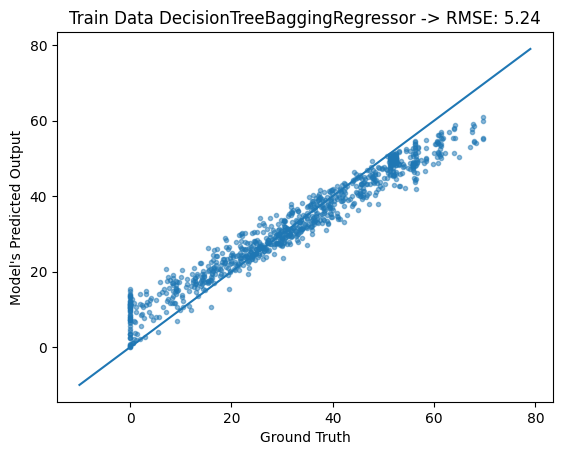

<Figure size 1000x1000 with 0 Axes>

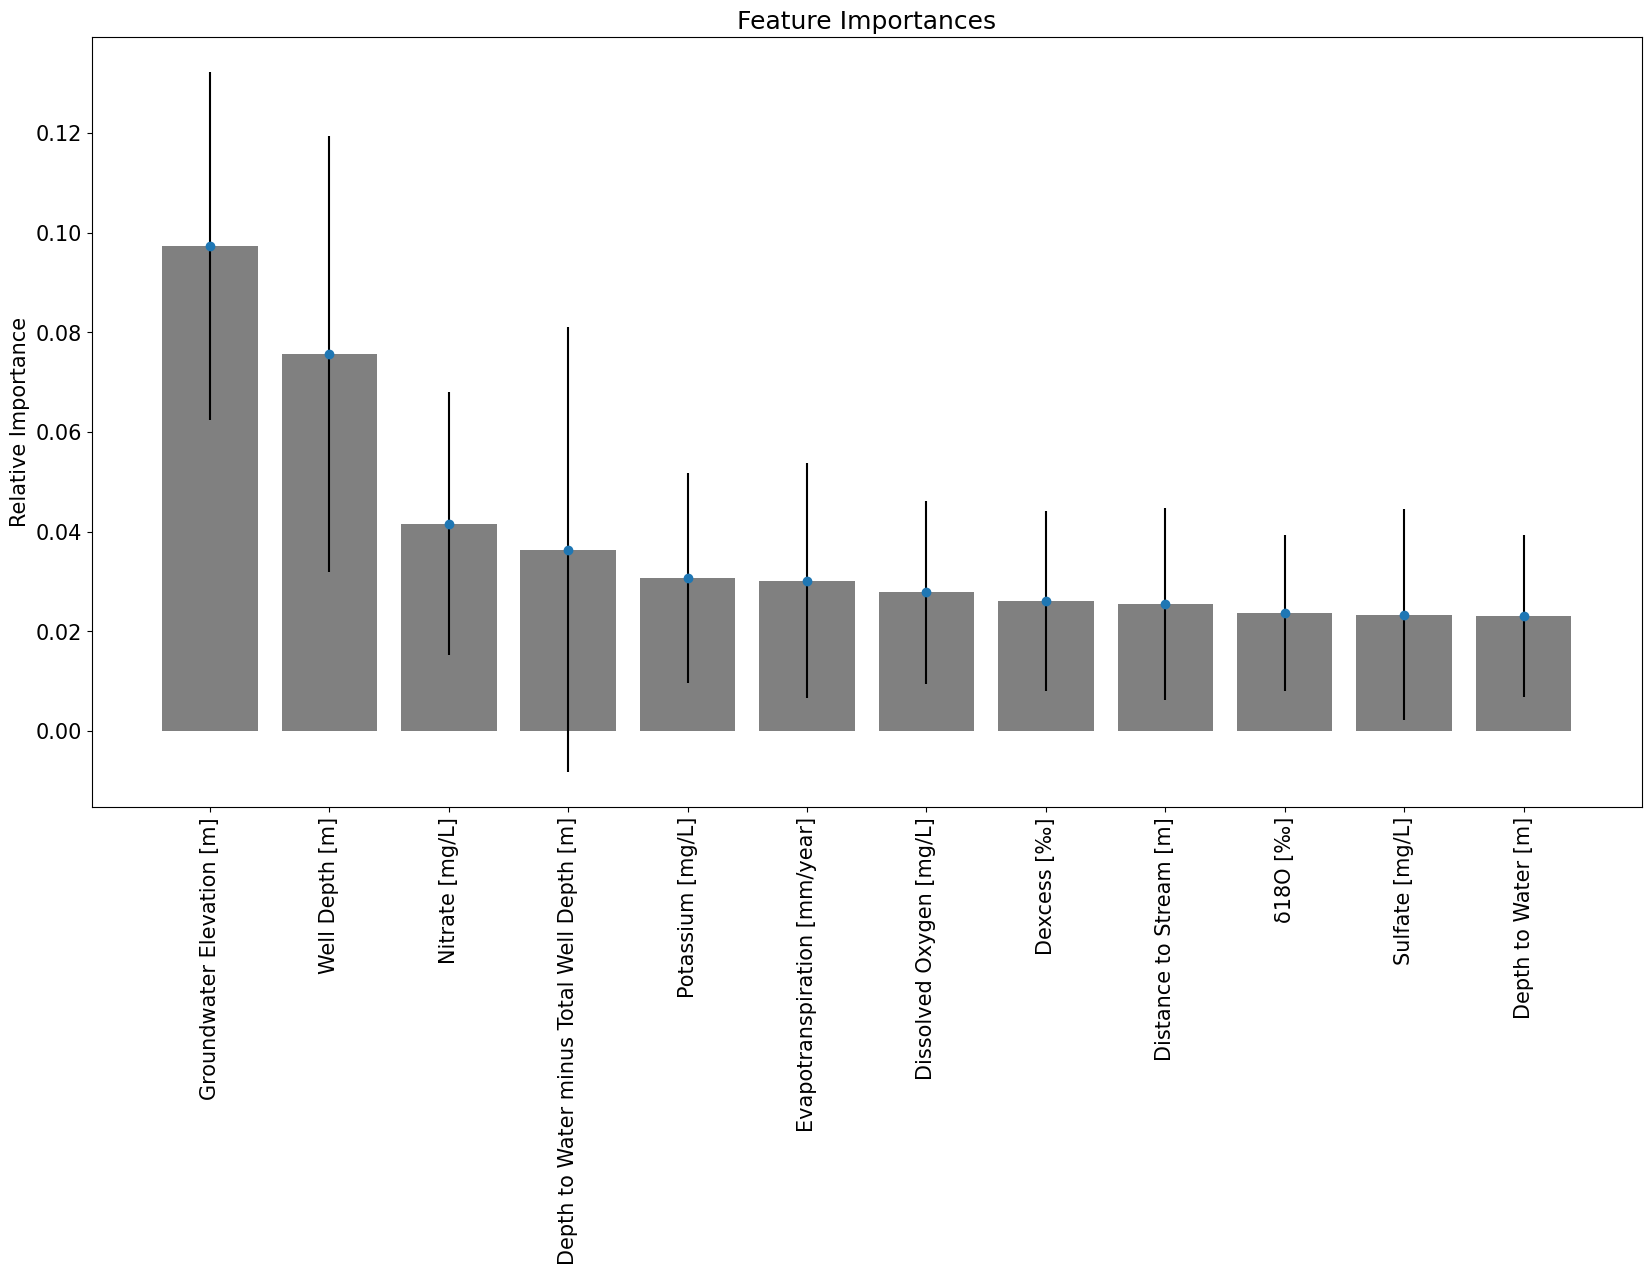

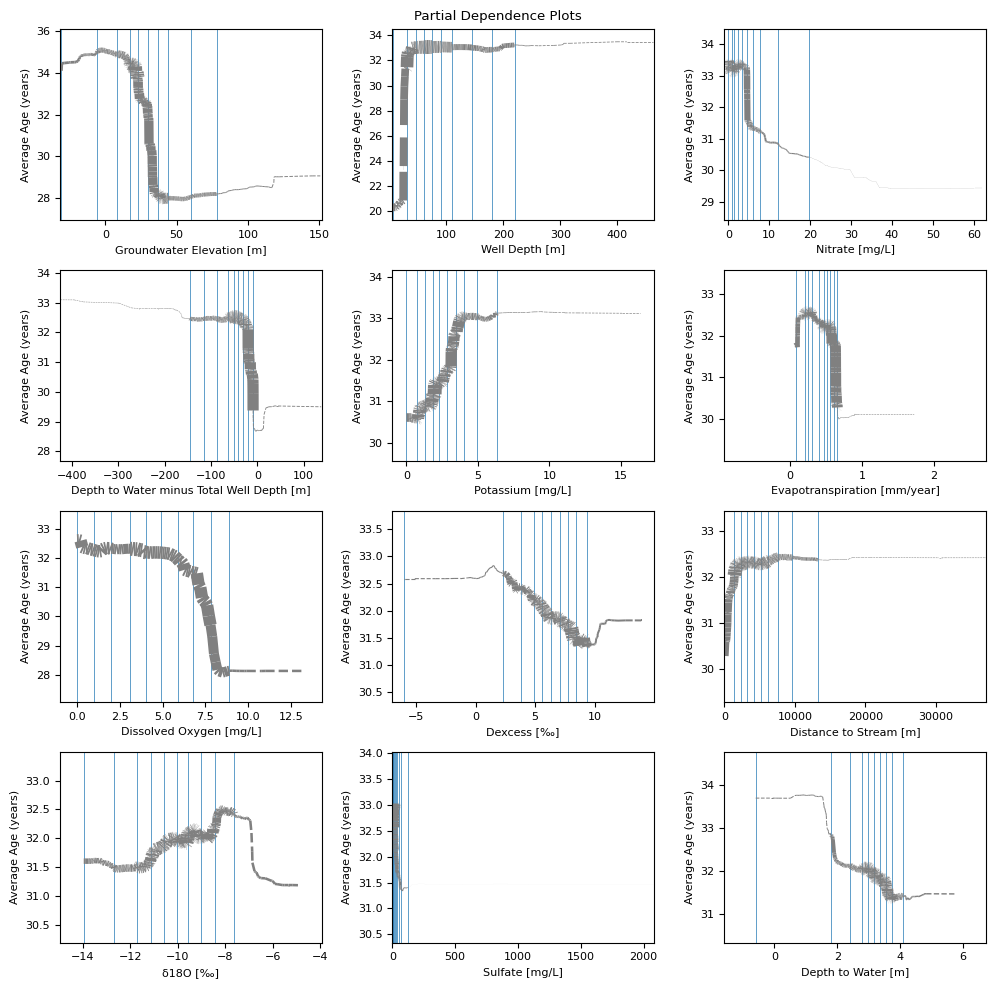

In [8]:
output_regressor = decision_tree_regressor(X_train=X_train_young,X_test=None,y_train=y_train_young,y_test=None,regressor='DecisionTreeBaggingRegressor',feature_imp=True,hyperparameter=False,plot_tree=False)

pdp_outputs = partial_dependence_plot(output_regressor, X_train_young,y_train_young,plot=True)

### Overall Model Performance on regression Trees 

Performing Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 10, 'random_state': None, 'splitter': 'best'}
Best score (GridSearchCV.best_score_): -450.3601141209086
Train RMSE: 17.168990874333886
Train R-squared Score: 0.5158518491491288
Test RMSE: 20.770722286773303
Test R-squared Score: 0.3370573018695088
1
Performing Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 20, 'random_state': None, 'splitter': 'best'}
Best score (GridSearchCV.best_score_): -450.31867344961154
Train RMSE: 17.168990874333886
Train R-squared Score: 0.515851849149128

/Users/azhara001/Documents/MAR Repo/Script_Files/decision_tree_regressor.py:283: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Number of nodes in the last tree is 3 with ccp_alpha as 55.34558638062208
DecisionTreeRegressor(ccp_alpha=43.63263240738655)
Train RMSE: 17.971022323363954
Train R-squared Score: 0.4695623953591844
Test RMSE: 21.004698726780518
Test R-squared Score: 0.32203744626278397
8
Performing Decision Tree Regression via Pruning: ...
Building an overfitted decision tree and performing ccp_alpha pruning 

Number of nodes in the last tree is 3 with ccp_alpha as 48.5974090043328
DecisionTreeRegressor(ccp_alpha=43.454513099091855)
Train RMSE: 18.483285929468135
Train R-squared Score: 0.4388911717752003
Test RMSE: 21.509467187503702
Test R-squared Score: 0.28906139362743055
9
Performing Decision Tree Regression via Pruning: ...
Building an overfitted decision tree and performing ccp_alpha pruning 

Number of nodes in the last tree is 3 with ccp_alpha as 55.868175973816506
DecisionTreeRegressor(ccp_alpha=38.58849687460312)
Train RMSE: 19.71582371272456
Train R-squared Score: 0.361562202832195
Test RMSE

/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.496921008425398
Train R-squared Score: 0.930672759979316
Test RMSE: 17.429766461847613
Test R-squared Score: 0.533173039669208
1
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.7463300517088


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.582516647637362
Train R-squared Score: 0.9288339813421689
Test RMSE: 17.676798083373193
Test R-squared Score: 0.5198466141964555
2
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.36361959741544


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.469027614692877
Train R-squared Score: 0.9312667708481234
Test RMSE: 17.527669559999694
Test R-squared Score: 0.5279139715013117
3
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 200, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.6092421336927


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.50435952720284
Train R-squared Score: 0.9305139194480609
Test RMSE: 17.65564447679656
Test R-squared Score: 0.5209951138747242
4
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 



/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.7470226621889


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.494628974717451
Train R-squared Score: 0.9307216669436313
Test RMSE: 17.45016300457563
Test R-squared Score: 0.5320798262578167
5
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.7165104328649


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.435363354842036
Train R-squared Score: 0.9319802730552211
Test RMSE: 17.405356830979038
Test R-squared Score: 0.5344796658541493
6
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.15930027447587


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.49381782697065
Train R-squared Score: 0.930738970920422
Test RMSE: 17.34881445980629
Test R-squared Score: 0.5374992959681685
7
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 3000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -319.3934551059939


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.439517894522544
Train R-squared Score: 0.9318924204021689
Test RMSE: 17.39922240435206
Test R-squared Score: 0.5348077484235119
8
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 200, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.87036793724417


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.523806042494336
Train R-squared Score: 0.9300978040407362
Test RMSE: 17.54790436685002
Test R-squared Score: 0.5268233435031505
9
Performing Bagging Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'estimator': DecisionTreeRegressor(random_state=37), 'max_samples': 1.0, 'n_estimators': 3000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.9902152357477


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train RMSE: 6.447370398491983
Train R-squared Score: 0.9317262150647174
Test RMSE: 17.43850432743613
Test R-squared Score: 0.5327048642982442
10
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -316.9752049286937


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.442116987973122
Train R-squared Score: 0.931837430668272
Test RMSE: 17.32594693228758
Test R-squared Score: 0.5387177397193048
1
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.7350594296472


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.464654525332994
Train R-squared Score: 0.931359667331328
Test RMSE: 17.427959732377573
Test R-squared Score: 0.5332698150694379
2
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.9541849448189


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.458018568690136
Train R-squared Score: 0.9315005133696483
Test RMSE: 17.352613726199515
Test R-squared Score: 0.5372967050892523
3
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.0314948857764


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.421621086987455
Train R-squared Score: 0.932270465609707
Test RMSE: 17.40361912458379
Test R-squared Score: 0.5345726139377172
4
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.7733730254653


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.455925133844855
Train R-squared Score: 0.9315449158341155
Test RMSE: 17.480431232868703
Test R-squared Score: 0.5304551539870994
5
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.16675342092657


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.5098566621157845
Train R-squared Score: 0.9303964180184854
Test RMSE: 17.52972465059139
Test R-squared Score: 0.5278032623818476
6
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -318.0916213824364


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.44996169921881
Train R-squared Score: 0.9316713233955097
Test RMSE: 17.39789539246353
Test R-squared Score: 0.5348787047103035
7
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 500, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.6625743976873


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.462841879644973
Train R-squared Score: 0.9313981545108666
Test RMSE: 17.416650158494324
Test R-squared Score: 0.5338753715303144
8
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -316.7559311739237


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.423674993032875
Train R-squared Score: 0.9322271331411917
Test RMSE: 17.390760585421
Test R-squared Score: 0.5352601152379866
9
Performing Random Forest Decision Tree Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.3333333333333333, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': None, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.88516855966947


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 6.404878528351088
Train R-squared Score: 0.9326231763780214
Test RMSE: 17.36940240861332
Test R-squared Score: 0.5364009395687899
10
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': None}
Best score (GridSearchCV.best_score_): -338.51240977320873


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.25591348353521
Train R-squared Score: 0.7113922030147598
Test RMSE: 17.977736289733787
Test R-squared Score: 0.5033587314332528
1
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': None}
Best score (GridSearchCV.best_score_): -339.32733335648993


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.183585995142668
Train R-squared Score: 0.7145330396754149
Test RMSE: 18.31028671636924
Test R-squared Score: 0.48481515020911137
2
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': None}
Best score (GridSearchCV.best_score_): -341.3986888878713


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.415946821244399
Train R-squared Score: 0.7043816462711898
Test RMSE: 17.940592790448193
Test R-squared Score: 0.5054088158036327
3
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': None}
Best score (GridSearchCV.best_score_): -333.42098005116014


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.413762991747651
Train R-squared Score: 0.7044778791418076
Test RMSE: 18.17788216213746
Test R-squared Score: 0.4922389762405095
4
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': None}
Best score (GridSearchCV.best_score_): -338.7087370418846


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.677162493361102
Train R-squared Score: 0.6927578813869133
Test RMSE: 18.00382787820514
Test R-squared Score: 0.5019161067716178
5
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': None}
Best score (GridSearchCV.best_score_): -342.55311927296174


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.08829182070887
Train R-squared Score: 0.7186449743403492
Test RMSE: 18.16395944708959
Test R-squared Score: 0.4930164820795673
6
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': None}
Best score (GridSearchCV.best_score_): -343.9708579818539


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.18791165529895
Train R-squared Score: 0.7143456800849497
Test RMSE: 17.891844981996616
Test R-squared Score: 0.5080929501209357
7
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': None}
Best score (GridSearchCV.best_score_): -341.2003889529133


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.718314679895446
Train R-squared Score: 0.6909062244662086
Test RMSE: 18.295472044451788
Test R-squared Score: 0.485648474890222
8
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': None}
Best score (GridSearchCV.best_score_): -336.16426759854943


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.686134207832644
Train R-squared Score: 0.6923546701739713
Test RMSE: 18.314817331436664
Test R-squared Score: 0.4845601686187886
9
Performing AdaBoost Regression with hyper-parameter tuning and cross-validation (5): 

Building an ensemble learning model using cross-validation 

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, random_state=37), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': None}
Best score (GridSearchCV.best_score_): -340.7850178971378


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 13.262207499708492
Train R-squared Score: 0.7111180712637859
Test RMSE: 18.23185950245776
Test R-squared Score: 0.4892190115012949
10
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 10, 'n_estimators': 200, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -319.2518159203338


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 12.526452016264145
Train R-squared Score: 0.7422819146861962
Test RMSE: 18.06351720525813
Test R-squared Score: 0.4986079685196505
1
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 10, 'n_estimators': 200, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -313.5274289672107


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 12.535276062529988
Train R-squared Score: 0.7419186965480202
Test RMSE: 18.33522135459574
Test R-squared Score: 0.48341105482322266
2
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 10, 'n_estimators': 200, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -323.49656193189537


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 12.585023500014566
Train R-squared Score: 0.7398661913440618
Test RMSE: 18.072865317438765
Test R-squared Score: 0.4980888800482334
3
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 30, 'n_estimators': 500, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -315.6029088658399


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 8.663829845938364
Train R-squared Score: 0.8767154749097398
Test RMSE: 17.98815689453352
Test R-squared Score: 0.5027828188480192
4
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 10, 'n_estimators': 500, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -319.59684097188335


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 8.671214342259308
Train R-squared Score: 0.8765052256044985
Test RMSE: 17.986692509407735
Test R-squared Score: 0.5028637707555698
5
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 30, 'n_estimators': 500, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -320.3222232597194


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 8.59983782404556
Train R-squared Score: 0.8785299359074533
Test RMSE: 17.715833265080978
Test R-squared Score: 0.5177236540021446
6
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 10, 'n_estimators': 200, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -320.00180314036504


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 12.635910191767639
Train R-squared Score: 0.7377582713869177
Test RMSE: 17.961597831778406
Test R-squared Score: 0.5042499923343681
7
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 30, 'n_estimators': 200, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -317.90618527923317


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 12.718685247384602
Train R-squared Score: 0.7343112426470615
Test RMSE: 17.973915911425365
Test R-squared Score: 0.5035697875861428
8
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 30, 'n_estimators': 200, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -321.2833611897639


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 12.520340561214084
Train R-squared Score: 0.7425333263828826
Test RMSE: 18.02573209487983
Test R-squared Score: 0.5007033897360929
9
Performing Gradient Boosting Regression with hyper-parameter tuning and cross-validation (5): ... 
Building an ensemble learning model using cross-validation 

Best parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_leaf_nodes': 10, 'n_estimators': 200, 'random_state': None, 'subsample': 0.5, 'verbose': 0}
Best score (GridSearchCV.best_score_): -322.38732522599327


/Users/azhara001/opt/anaconda3/envs/deeplearning_env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 12.585196667555802
Train R-squared Score: 0.7398590325108734
Test RMSE: 17.822856932350128
Test R-squared Score: 0.5118790641546997
10


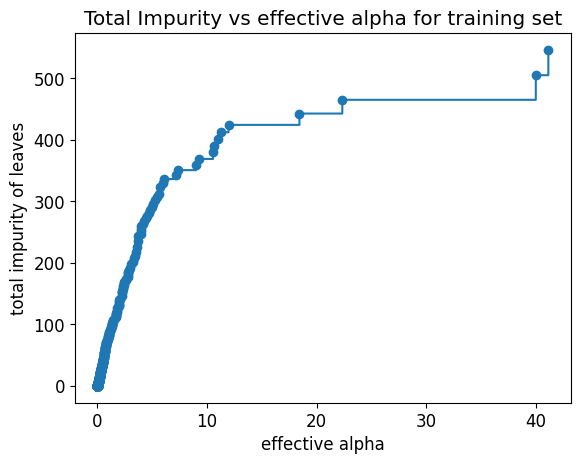

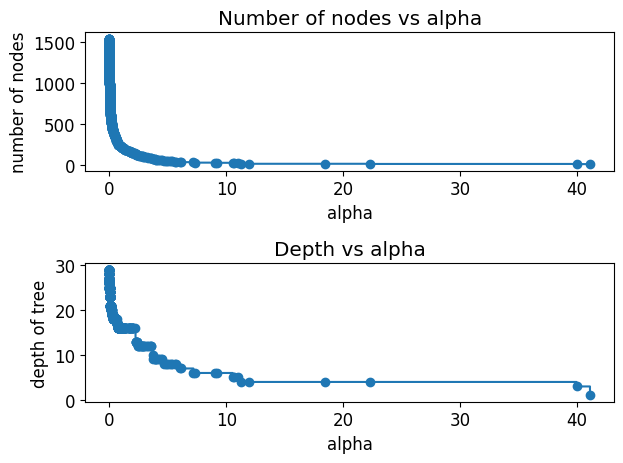

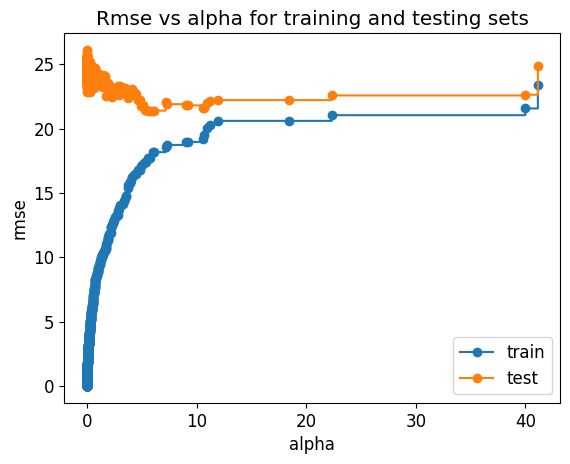

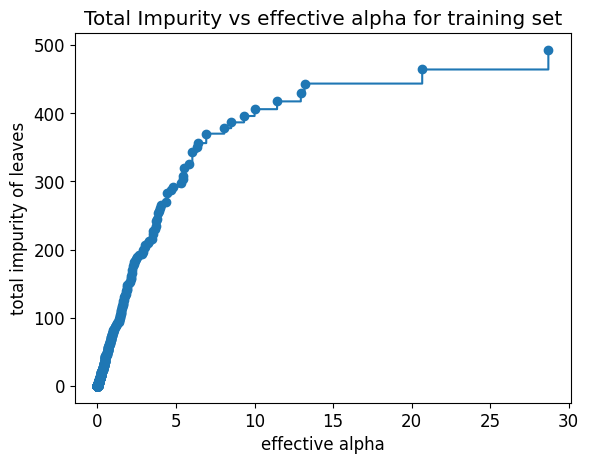

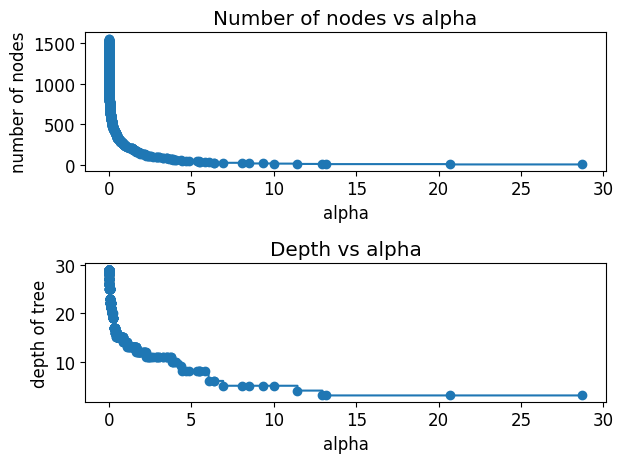

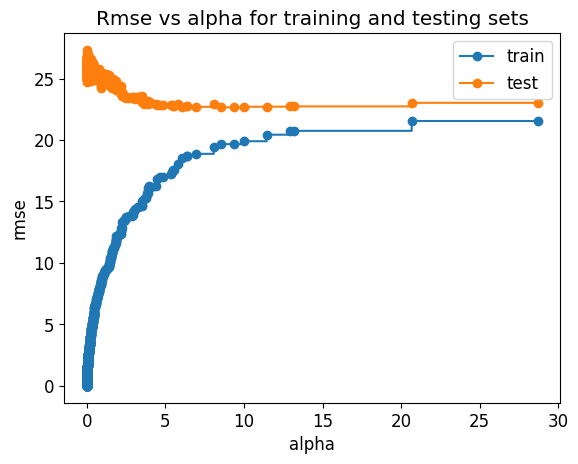

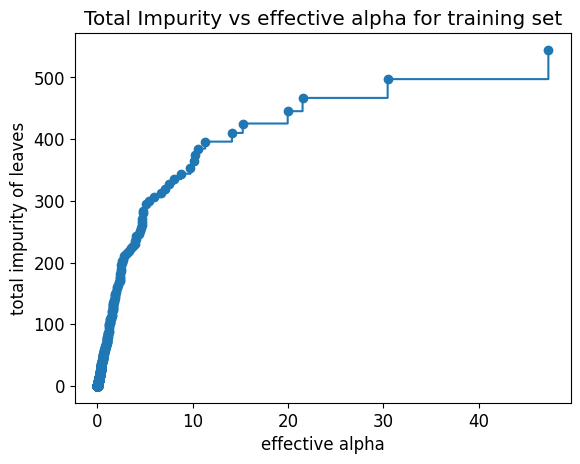

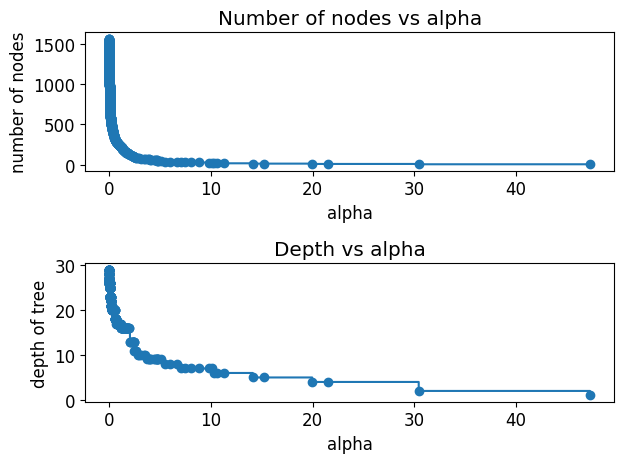

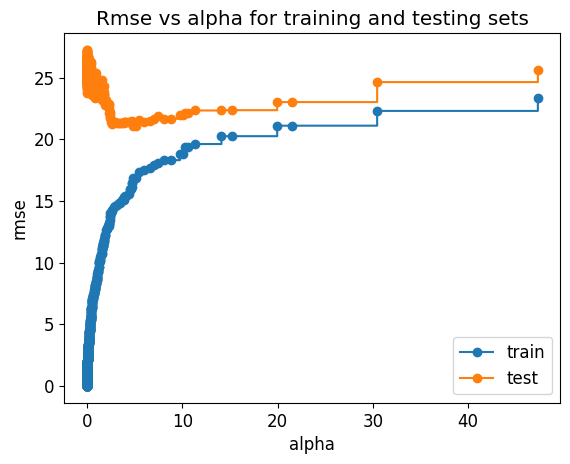

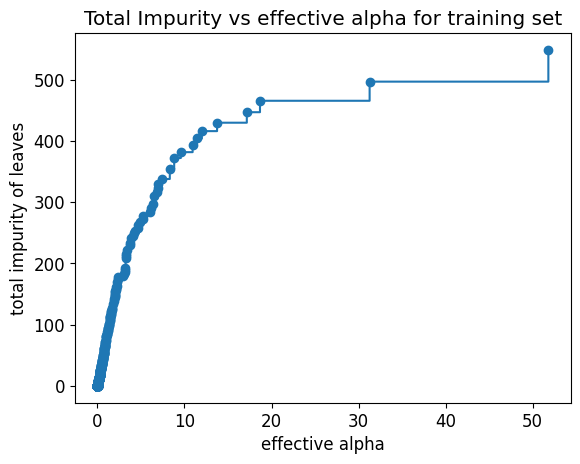

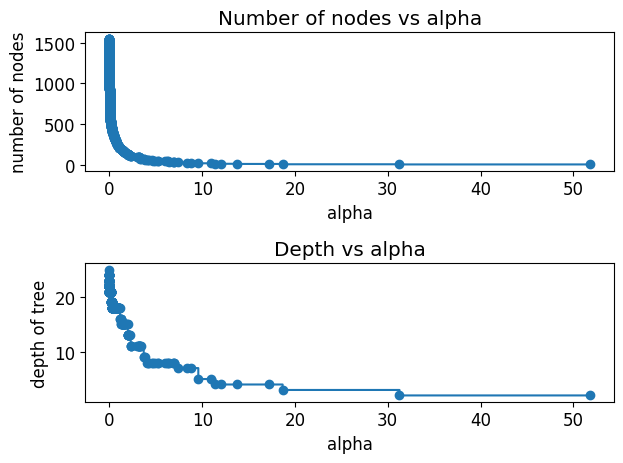

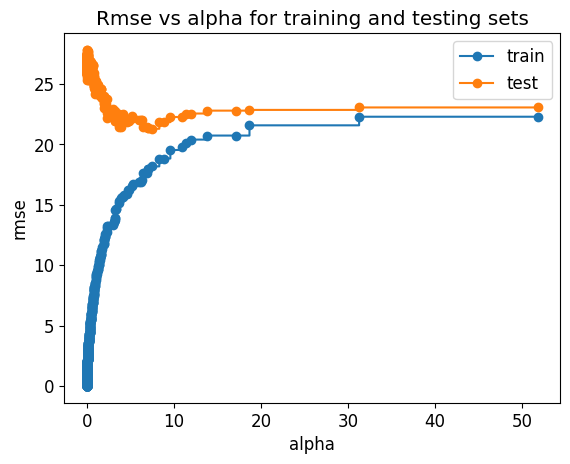

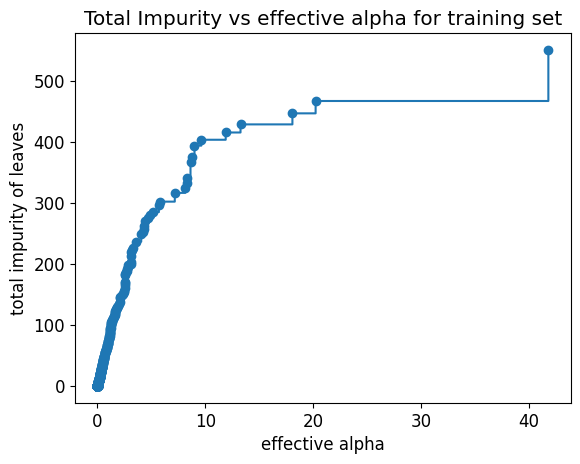

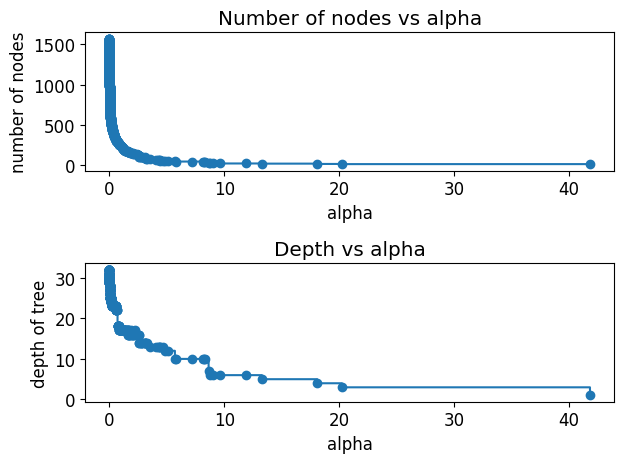

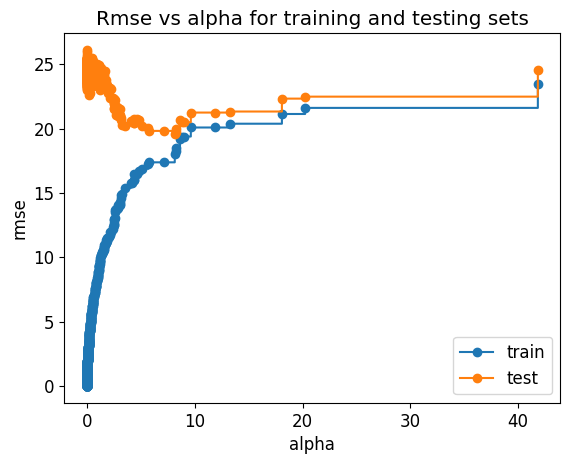

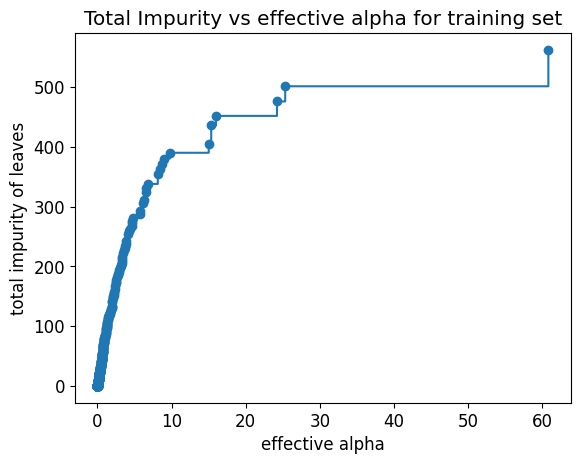

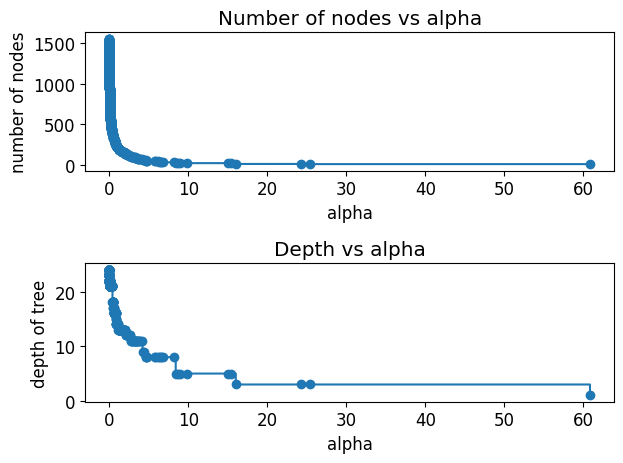

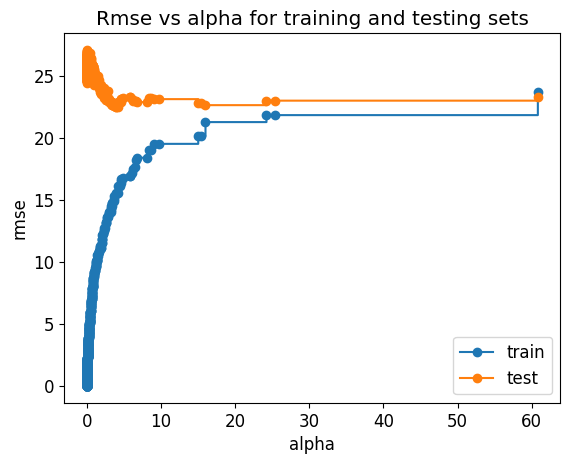

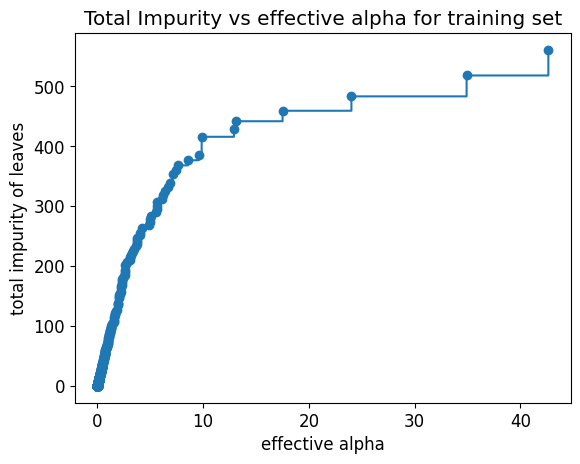

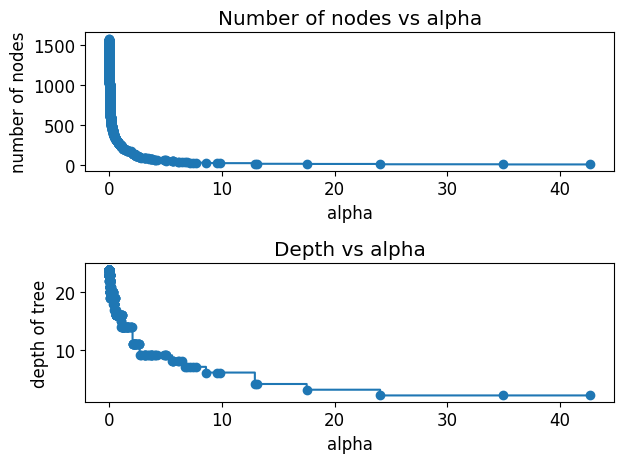

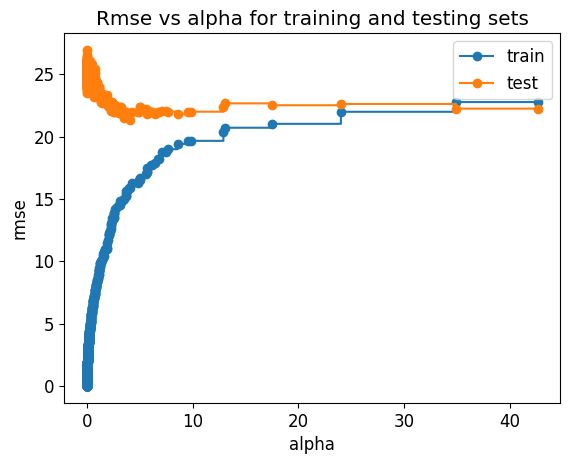

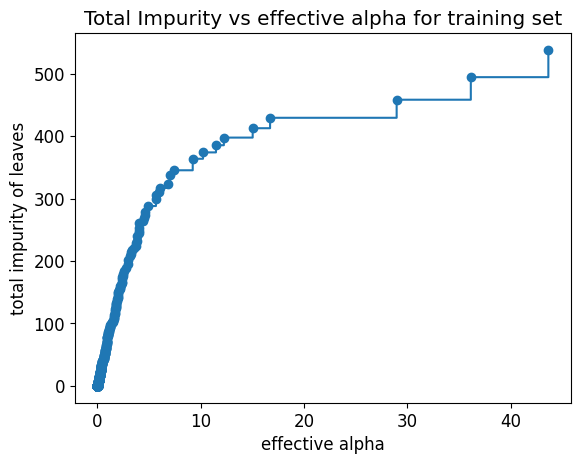

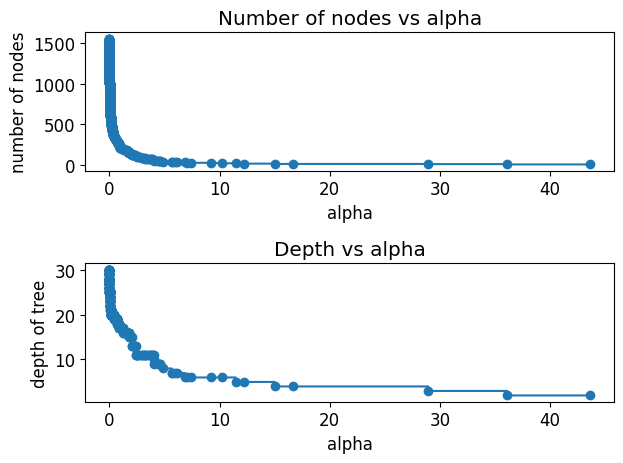

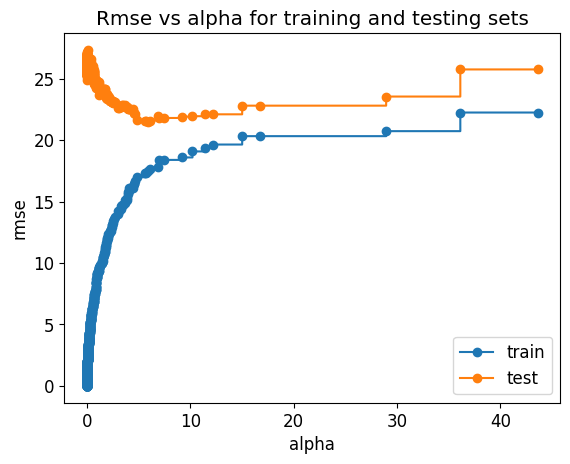

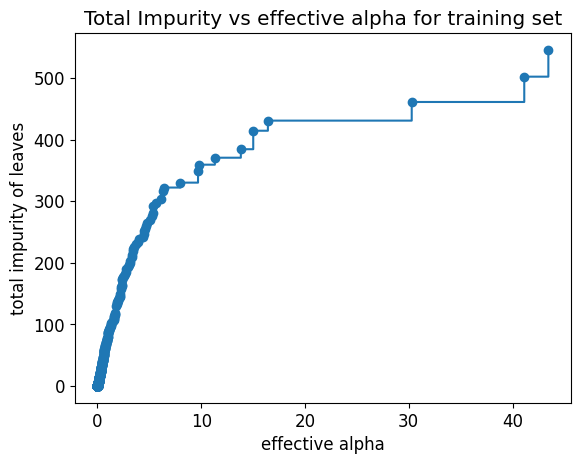

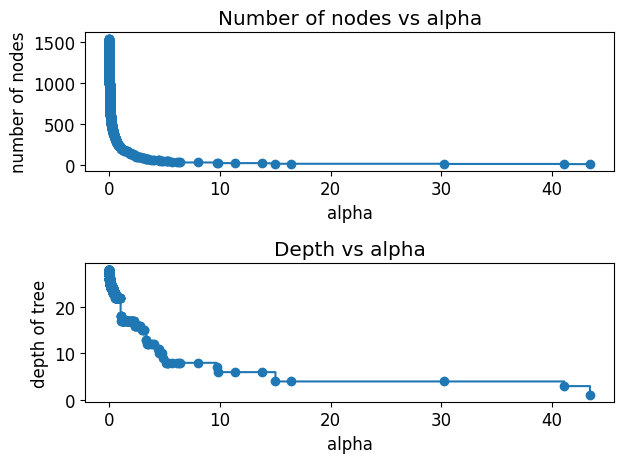

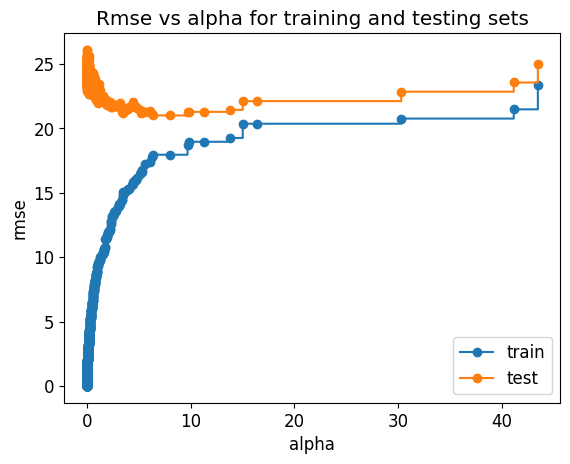

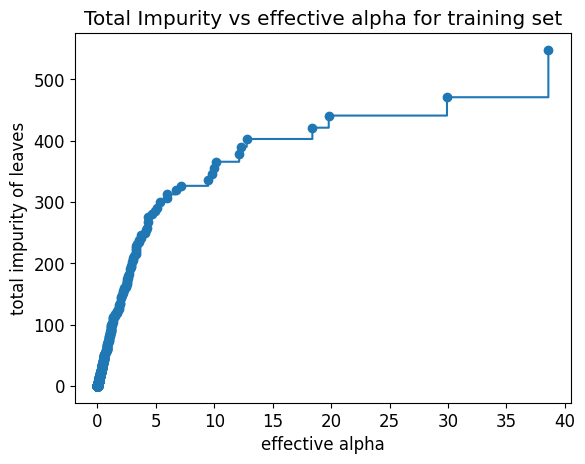

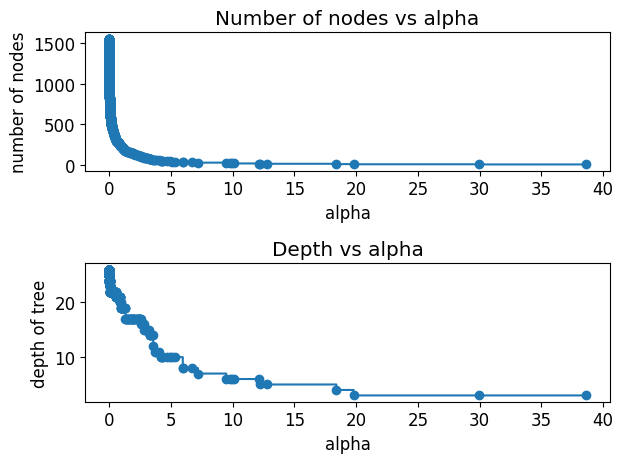

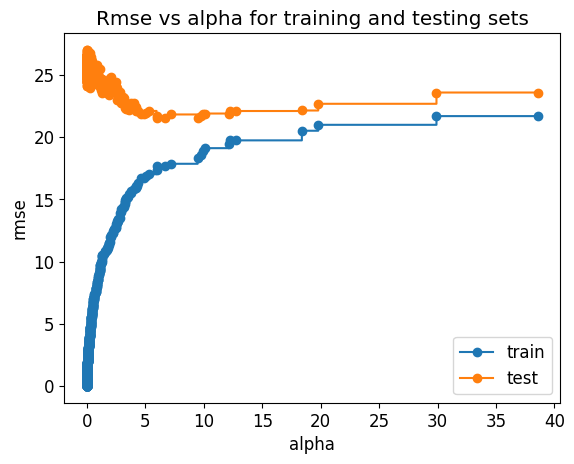

In [6]:
# run each model 10 times and compute the error bars ... 
# then run the subplots script ... 

num_runs = 10

regressors = ['DecisionTree','DecisionTreePruned','DecisionTreeBaggingRegressor','RandomForest','ADABoost','GradientBoosting']
iterr = 0
serial_no, regressor_type, train_rmses, train_stds, test_rmses, test_stds, comp_time = [],[],[],[],[],[],[]

for regressor in regressors: # looping over the regressors 

        for i in range(0,num_runs):

            regressor_type.append(regressor)
            serial_no.append(iterr)

            timestart = datetime.datetime.now()
            output_regressor = decision_tree_regressor(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, regressor=regressor, feature_imp=False, hyperparameter=True, plot_tree=False, random_state=None,save_results=False,save_scatter=False)

            y_train_pred = output_regressor['best_model'].predict(X_train)
            y_test_pred = output_regressor['best_model'].predict(X_test)

            comp_time.append((datetime.datetime.now()-timestart).seconds)
            train_rmses.append(np.sqrt(mean_squared_error(y_train_pred,y_train)))
            test_rmses.append(np.sqrt(mean_squared_error(y_test_pred,y_test)))

            iterr += 1
            print(iterr)
        
        iterr = 0

        df_results = pd.DataFrame({
        'Regressor':regressor_type,
        'Serial_No.':serial_no,
        'Train_RMSE':train_rmses,
        'Test_RMSE':test_rmses,
        'Computation_Time':comp_time        
        })

        save_path = '../Result Files/'
        path = save_path+'Error_Bars'
        
        df_results.to_excel(f"{path}_{regressor}.xlsx")
    





#### Overall Results

Train DF shape: (1312, 6)
Test DF shape: (328, 6)


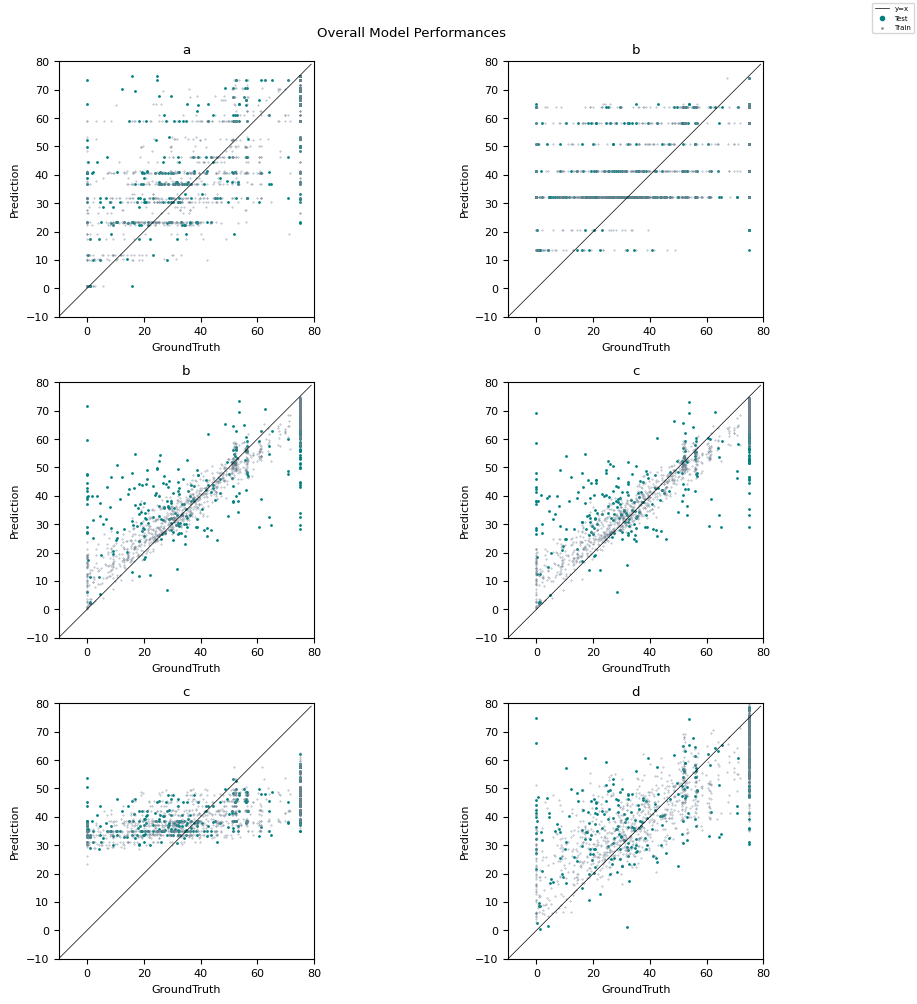

In [3]:
script_subplots()